### Koga kje se dopravi proektot(posoodevtno izbrani grafici/novi, po hiperparametrizirani modeli, dosreden streamlit) kje bide prikacen nov fajl i link do streamlit

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from functools import partial
import re
from scipy.stats import skew, kurtosis
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split, KFold, StratifiedKFold

import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [2]:
user_root = "C:/Users/veron/Downloads/ML Project VT/ArchivedUsers/"
user_fn_list = os.listdir(user_root)

In [3]:
def read_one_file(fn, root):
    out = dict()
    with open(root + fn) as f:
        for line in f.readlines():
            k, v = line.split(": ")
            out[k] = v.strip()
            out['ID'] = re.findall(r'_(\w+)\.', fn)[0]
    return out

In [4]:
users_list = list(map(partial(read_one_file, root=user_root), user_fn_list))

In [5]:
users_list

[{'BirthYear': '1959',
  'ID': '0QAZFRHQHW',
  'Gender': 'Female',
  'Parkinsons': 'False',
  'Tremors': 'False',
  'DiagnosisYear': '------',
  'Sided': 'None',
  'UPDRS': "Don't know",
  'Impact': '------',
  'Levadopa': 'False',
  'DA': 'False',
  'MAOB': 'False',
  'Other': 'False'},
 {'BirthYear': '1944',
  'ID': '1HOEBIGASW',
  'Gender': 'Male',
  'Parkinsons': 'False',
  'Tremors': 'False',
  'DiagnosisYear': '------',
  'Sided': 'None',
  'UPDRS': "Don't know",
  'Impact': '------',
  'Levadopa': 'False',
  'DA': 'False',
  'MAOB': 'False',
  'Other': 'False'},
 {'BirthYear': '1936',
  'ID': '1XNJCXS3EY',
  'Gender': 'Male',
  'Parkinsons': 'False',
  'Tremors': 'False',
  'DiagnosisYear': '------',
  'Sided': 'None',
  'UPDRS': "Don't know",
  'Impact': '------',
  'Levadopa': 'False',
  'DA': 'False',
  'MAOB': 'False',
  'Other': 'False'},
 {'BirthYear': '1936',
  'ID': '3DIXPRIOSW',
  'Gender': 'Male',
  'Parkinsons': 'False',
  'Tremors': 'False',
  'DiagnosisYear': '-----

In [6]:
users = pd.DataFrame(users_list)
users

BirthYear          ID  Gender Parkinsons Tremors DiagnosisYear  Sided  \
0        1959  0QAZFRHQHW  Female      False   False        ------   None   
1        1944  1HOEBIGASW    Male      False   False        ------   None   
2        1936  1XNJCXS3EY    Male      False   False        ------   None   
3        1936  3DIXPRIOSW    Male      False   False        ------   None   
4        1950  48DZPAJ5NS    Male       True   False          2010   None   
..        ...         ...     ...        ...     ...           ...    ...   
108      1948  YQSGN9BMVK    Male      False   False        ------   None   
109      1953  YWMIQIQND3  Female       True    True          2016  Right   
110      1928  YYPKGX6B24    Male      False   False        ------   None   
111      1947  Z2UPVHHGBE  Female       True    True          2015  Right   
112      1942  ZWBPPNQCUX    Male       True   False          2016   None   

          UPDRS  Impact Levadopa     DA   MAOB  Other  
0    Don't know  ------    False  False  False  False  
1    Don't know  ------    False  False  False  False  
2    Don't know  ------    False  False  False  False  
3    Don't know  ------    False  False  False  False  
4    Don't know    Mild    False  False  False   True  
..          ...     ...      ...    ...    ...    ...  
108  Don't know  ------    False  False  False  False  
109  Don't know    Mild    False  False  False  False  
110  Don't know  ------    False  False  False  False  
111  Don't know    Mild    False  False  False   True  
112  Don't know    Mild     True  False  False  False  

[113 rows x 13 columns]

In [7]:
users.replace('------', np.nan, inplace=True)
users.replace('', np.nan, inplace=True)
users['Levadopa'] = users['Levadopa'] == 'True'
users['MAOB'] = users['MAOB'] == 'True'
users['Parkinsons'] = users['Parkinsons'] == 'True'
users['Tremors'] = users['Tremors'] == 'True'
users['Other'] = users['Other'] == 'True'

In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   BirthYear      98 non-null     object
 1   ID             113 non-null    object
 2   Gender         113 non-null    object
 3   Parkinsons     113 non-null    bool  
 4   Tremors        113 non-null    bool  
 5   DiagnosisYear  60 non-null     object
 6   Sided          113 non-null    object
 7   UPDRS          113 non-null    object
 8   Impact         66 non-null     object
 9   Levadopa       113 non-null    bool  
 10  DA             113 non-null    object
 11  MAOB           113 non-null    bool  
 12  Other          113 non-null    bool  
dtypes: bool(5), object(8)
memory usage: 7.7+ KB


In [9]:
users

BirthYear          ID  Gender  Parkinsons  Tremors DiagnosisYear  Sided  \
0        1959  0QAZFRHQHW  Female       False    False           NaN   None   
1        1944  1HOEBIGASW    Male       False    False           NaN   None   
2        1936  1XNJCXS3EY    Male       False    False           NaN   None   
3        1936  3DIXPRIOSW    Male       False    False           NaN   None   
4        1950  48DZPAJ5NS    Male        True    False          2010   None   
..        ...         ...     ...         ...      ...           ...    ...   
108      1948  YQSGN9BMVK    Male       False    False           NaN   None   
109      1953  YWMIQIQND3  Female        True     True          2016  Right   
110      1928  YYPKGX6B24    Male       False    False           NaN   None   
111      1947  Z2UPVHHGBE  Female        True     True          2015  Right   
112      1942  ZWBPPNQCUX    Male        True    False          2016   None   

          UPDRS Impact  Levadopa     DA   MAOB  Other  
0    Don't know    NaN     False  False  False  False  
1    Don't know    NaN     False  False  False  False  
2    Don't know    NaN     False  False  False  False  
3    Don't know    NaN     False  False  False  False  
4    Don't know   Mild     False  False  False   True  
..          ...    ...       ...    ...    ...    ...  
108  Don't know    NaN     False  False  False  False  
109  Don't know   Mild     False  False  False  False  
110  Don't know    NaN     False  False  False  False  
111  Don't know   Mild     False  False  False   True  
112  Don't know   Mild      True  False  False  False  

[113 rows x 13 columns]

In [10]:
keys_root = "C:/Users/veron/Downloads/ML Project VT/TappyData/"
keys_fn_list = os.listdir(keys_root)

In [11]:
def read_one_key_file(fn, root):
    # try:
    df = pd.read_csv(root + fn, delimiter='\t', header=None, on_bad_lines='skip',
                         usecols=range(8), low_memory=False)
    df.columns = ['ID', 'Date', 'TS', 'Hand', 'HoldTime', 'Direction', 'LatencyTime', 'FlightTime']
    df = df[df['ID'].apply(lambda x: len(str(x)) == 10)
                   & df['Date'].apply(lambda x: len(str(x)) == 6)
                   & df['TS'].apply(lambda x: len(str(x)) == 12)
                   & np.in1d(df['Hand'], ["L", "R", "S"])
                   & df['HoldTime'].apply(lambda x: re.search(r"[^\d.]", str(x)) is None)
                   & np.in1d(df['Direction'], ['LL', 'LR', 'RL', 'RR', 'LS', 'SL', 'RS', 'SR', 'RR'])
                   & df['LatencyTime'].apply(lambda x: re.search(r"[^\d.]", str(x)) is None)
                   & df['FlightTime'].apply(lambda x: re.search(r"[^\d.]", str(x)) is None)]
    df['HoldTime'] = df['HoldTime'].astype(float)
    df['LatencyTime'] = df['LatencyTime'].astype(float)
    df['FlightTime'] = df['FlightTime'].astype(float)
    return df

In [12]:
keys_list = list(map(partial(read_one_key_file, root=keys_root), keys_fn_list))

In [13]:
keys_list

[             ID    Date            TS Hand  HoldTime Direction  LatencyTime  \
 0    0QAZFRHQHW  160916  19:20:43.891    L      78.1        LL        312.5   
 1    0QAZFRHQHW  160916  19:20:44.344    L      78.1        LL        453.1   
 2    0QAZFRHQHW  160916  19:20:44.742    L      62.5        LL        414.1   
 3    0QAZFRHQHW  160916  19:20:45.516    L      93.8        LL        742.2   
 4    0QAZFRHQHW  160916  19:20:46.047    R     101.6        LR        523.4   
 ..          ...     ...           ...  ...       ...       ...          ...   
 819  0QAZFRHQHW  160930  09:32:11.242    R      78.1        RR        234.4   
 820  0QAZFRHQHW  160930  09:32:13.555    R     156.3        LR        558.6   
 821  0QAZFRHQHW  160930  14:09:36.102    L      78.1        LL        476.6   
 822  0QAZFRHQHW  160930  21:51:49.695    L      93.8        LL        453.1   
 823  0QAZFRHQHW  160930  21:51:51.109    L     101.6        LL        476.6   
 
      FlightTime  
 0         257.8  


In [14]:
keys = pd.concat(keys_list, ignore_index=True, axis=0)

In [15]:
keys

ID    Date            TS Hand  HoldTime Direction  \
0        0QAZFRHQHW  160916  19:20:43.891    L      78.1        LL   
1        0QAZFRHQHW  160916  19:20:44.344    L      78.1        LL   
2        0QAZFRHQHW  160916  19:20:44.742    L      62.5        LL   
3        0QAZFRHQHW  160916  19:20:45.516    L      93.8        LL   
4        0QAZFRHQHW  160916  19:20:46.047    R     101.6        LR   
...             ...     ...           ...  ...       ...       ...   
4675448  ZWBPPNQCUX  161230  21:43:22.477    L     109.4        RL   
4675449  ZWBPPNQCUX  161231  08:35:18.164    L     107.4        LL   
4675450  ZWBPPNQCUX  161231  08:35:27.510    L     109.4        LL   
4675451  ZWBPPNQCUX  161231  08:35:27.979    L     138.7        LL   
4675452  ZWBPPNQCUX  161231  09:05:25.348    L     111.3        RL   

         LatencyTime  FlightTime  
0              312.5       257.8  
1              453.1       375.0  
2              414.1       335.9  
3              742.2       679.7  
4              523.4       429.7  
...              ...         ...  
4675448        250.0       125.0  
4675449        439.5       330.1  
4675450        390.6       281.3  
4675451        439.5       330.1  
4675452        482.4       375.0  

[4675453 rows x 8 columns]

In [16]:
user_w_sufficient_data = set((keys.groupby('ID').size() >= 2000).index)
user_eligible = set(users[((users['Parkinsons']) & (users['Impact'] == 'Mild') 
                       | (~users['Parkinsons']))
                      & (~users['Levadopa'])]['ID'])
user_valid = user_w_sufficient_data.intersection(user_eligible)

In [17]:
valid_keys = keys[(keys['HoldTime'] > 0)
                   & (keys['FlightTime'] > 0)
                   & (keys['HoldTime'] < 2000)
                   & (keys['FlightTime'] < 2000)
                   & np.in1d(keys['ID'], list(user_valid))]

In [18]:
hold_by_user =  valid_keys[valid_keys['Hand'] != 'S'].groupby(['ID', 'Hand'])['HoldTime'].agg([np.mean])

C:\Users\veron\AppData\Local\Temp\ipykernel_2720\2000028964.py:1: FutureWarning: The provided callable <function mean at 0x000001945568E0C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  hold_by_user =  valid_keys[valid_keys['Hand'] != 'S'].groupby(['ID', 'Hand'])['HoldTime'].agg([np.mean])


In [19]:
hold_by_user

mean
ID         Hand            
0QAZFRHQHW L      98.931818
           R     101.595749
1HOEBIGASW L      66.280645
           R      65.036667
1XNJCXS3EY L     153.702407
...                     ...
YWMIQIQND3 R     143.413333
YYPKGX6B24 L     148.072662
           R     143.832754
Z2UPVHHGBE L     131.337228
           R     122.645700

[162 rows x 1 columns]

In [20]:
FlightTime_by_user = valid_keys[np.in1d(valid_keys['Direction'], ['LL', 'LR', 'RL', 'RR'])].groupby(['ID', 'Direction'])['FlightTime'].agg([np.mean])

C:\Users\veron\AppData\Local\Temp\ipykernel_2720\3723275535.py:1: FutureWarning: The provided callable <function mean at 0x000001945568E0C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  FlightTime_by_user = valid_keys[np.in1d(valid_keys['Direction'], ['LL', 'LR', 'RL', 'RR'])].groupby(['ID', 'Direction'])['FlightTime'].agg([np.mean])


In [21]:
FlightTime_by_user

mean
ID         Direction            
0QAZFRHQHW LL         309.675159
           LR         308.390083
           RL         326.538462
           RR         267.176863
1HOEBIGASW LL         319.511765
...                          ...
YYPKGX6B24 RR         405.743478
Z2UPVHHGBE LL         154.919598
           LR         216.487980
           RL         173.605522
           RR         233.668296

[324 rows x 1 columns]

In [22]:
hold_by_user_flat = hold_by_user.unstack()
hold_by_user_flat.columns = ['_'.join(col).strip() for col in hold_by_user_flat.columns.values]
hold_by_user_flat['mean_hold_diff'] = abs(hold_by_user_flat['mean_L'] - hold_by_user_flat['mean_R'])
hold_by_user_flat.head()

mean_L      mean_R  mean_hold_diff
ID                                                
0QAZFRHQHW   98.931818  101.595749        2.663930
1HOEBIGASW   66.280645   65.036667        1.243978
1XNJCXS3EY  153.702407  105.622423       48.079984
3DIXPRIOSW  147.626087  167.039039       19.412952
48DZPAJ5NS  125.182493  126.045471        0.862979

In [23]:
FlightTime_by_user_flat = FlightTime_by_user.unstack()
FlightTime_by_user_flat.columns = ['_'.join(col).strip() for col in FlightTime_by_user_flat.columns.values]
FlightTime_by_user_flat['mean_LR_RL_diff'] = abs(FlightTime_by_user_flat['mean_LR'] - FlightTime_by_user_flat['mean_RL'])
FlightTime_by_user_flat['mean_LL_RR_diff'] = abs(FlightTime_by_user_flat['mean_LL'] - FlightTime_by_user_flat['mean_RR'])
FlightTime_by_user_flat.head()

mean_LL     mean_LR     mean_RL     mean_RR  mean_LR_RL_diff  \
ID                                                                            
0QAZFRHQHW  309.675159  308.390083  326.538462  267.176863        18.148379   
1HOEBIGASW  319.511765  529.633333  468.335714  329.635294        61.297619   
1XNJCXS3EY  227.021698  164.504610  220.913661  214.592083        56.409051   
3DIXPRIOSW  373.192713  436.250442  332.958031  317.234259       103.292411   
48DZPAJ5NS  176.795994  209.198343  194.253176  210.431553        14.945166   

            mean_LL_RR_diff  
ID                           
0QAZFRHQHW        42.498296  
1HOEBIGASW        10.123529  
1XNJCXS3EY        12.429615  
3DIXPRIOSW        55.958453  
48DZPAJ5NS        33.635559

In [24]:
combined = pd.concat([hold_by_user_flat, FlightTime_by_user_flat], axis=1)

In [25]:
full_set = pd.merge(combined.reset_index(), users[['ID', 'Parkinsons']], on='ID')
full_set.set_index('ID', inplace=True)
full_set.dropna(inplace=True)  # should investigate why there are NAs despite choosing sequence length >= 2000
full_set

mean_L      mean_R  mean_hold_diff     mean_LL     mean_LR  \
ID                                                                           
0QAZFRHQHW   98.931818  101.595749        2.663930  309.675159  308.390083   
1HOEBIGASW   66.280645   65.036667        1.243978  319.511765  529.633333   
1XNJCXS3EY  153.702407  105.622423       48.079984  227.021698  164.504610   
3DIXPRIOSW  147.626087  167.039039       19.412952  373.192713  436.250442   
48DZPAJ5NS  125.182493  126.045471        0.862979  176.795994  209.198343   
...                ...         ...             ...         ...         ...   
YIA9DW5AGQ   74.926898   73.006689        1.920209  162.023400  173.638710   
YQSGN9BMVK  101.932172  114.030694       12.098522  215.106704  159.148743   
YWMIQIQND3  103.910159  143.413333       39.503175  158.630065  177.938776   
YYPKGX6B24  148.072662  143.832754        4.239908  357.551718  291.620313   
Z2UPVHHGBE  131.337228  122.645700        8.691528  154.919598  216.487980   

               mean_RL     mean_RR  mean_LR_RL_diff  mean_LL_RR_diff  \
ID                                                                     
0QAZFRHQHW  326.538462  267.176863        18.148379        42.498296   
1HOEBIGASW  468.335714  329.635294        61.297619        10.123529   
1XNJCXS3EY  220.913661  214.592083        56.409051        12.429615   
3DIXPRIOSW  332.958031  317.234259       103.292411        55.958453   
48DZPAJ5NS  194.253176  210.431553        14.945166        33.635559   
...                ...         ...              ...              ...   
YIA9DW5AGQ  212.575596  192.310112        38.936886        30.286712   
YQSGN9BMVK  180.505063  186.857911        21.356320        28.248793   
YWMIQIQND3  128.561261  244.413846        49.377514        85.783781   
YYPKGX6B24  438.157447  405.743478       146.537134        48.191761   
Z2UPVHHGBE  173.605522  233.668296        42.882459        78.748698   

            Parkinsons  
ID                      
0QAZFRHQHW       False  
1HOEBIGASW       False  
1XNJCXS3EY       False  
3DIXPRIOSW       False  
48DZPAJ5NS        True  
...                ...  
YIA9DW5AGQ       False  
YQSGN9BMVK       False  
YWMIQIQND3        True  
YYPKGX6B24       False  
Z2UPVHHGBE        True  

[81 rows x 10 columns]

In [26]:
users=users.drop(["UPDRS"], axis=1) # deka ima 1 vrednost samo, ova ne ni znaci, zatoa ja seceme

In [27]:
#Dodavanje nova kolona za datumot da bide vo format datum 
keys['Date'] = keys['Date'].astype(str)
import datetime 
def convert(date_time): 
    format = '%y%m%d'
    datetime_str = datetime.datetime.strptime(date_time, format)
    return datetime_str 
dd =[]
for date in keys['Date']:
    # print(date)
    dd.append(convert(date))
keys['DateN']= pd.Series(dd)  
# convert('161231')

### Encoding on categorical variable

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

users['Gender'] = encoder.fit_transform(users['Gender'])
users['Parkinsons'] = encoder.fit_transform(users['Parkinsons'])
users['Tremors'] = encoder.fit_transform(users['Tremors'])
users['Sided'] = encoder.fit_transform(users['Sided'])
users['Impact'] = encoder.fit_transform(users['Impact'])
users['Levadopa'] = encoder.fit_transform(users['Levadopa'])
users['DA'] = encoder.fit_transform(users['DA'])
users['MAOB'] = encoder.fit_transform(users['MAOB'])
users['Other'] = encoder.fit_transform(users['Other'])

In [29]:
full_set1 = pd.merge(full_set, users, on='ID', how='inner')
full_set1

ID      mean_L      mean_R  mean_hold_diff     mean_LL  \
0   0QAZFRHQHW   98.931818  101.595749        2.663930  309.675159   
1   1HOEBIGASW   66.280645   65.036667        1.243978  319.511765   
2   1XNJCXS3EY  153.702407  105.622423       48.079984  227.021698   
3   3DIXPRIOSW  147.626087  167.039039       19.412952  373.192713   
4   48DZPAJ5NS  125.182493  126.045471        0.862979  176.795994   
..         ...         ...         ...             ...         ...   
76  YIA9DW5AGQ   74.926898   73.006689        1.920209  162.023400   
77  YQSGN9BMVK  101.932172  114.030694       12.098522  215.106704   
78  YWMIQIQND3  103.910159  143.413333       39.503175  158.630065   
79  YYPKGX6B24  148.072662  143.832754        4.239908  357.551718   
80  Z2UPVHHGBE  131.337228  122.645700        8.691528  154.919598   

       mean_LR     mean_RL     mean_RR  mean_LR_RL_diff  mean_LL_RR_diff  ...  \
0   308.390083  326.538462  267.176863        18.148379        42.498296  ...   
1   529.633333  468.335714  329.635294        61.297619        10.123529  ...   
2   164.504610  220.913661  214.592083        56.409051        12.429615  ...   
3   436.250442  332.958031  317.234259       103.292411        55.958453  ...   
4   209.198343  194.253176  210.431553        14.945166        33.635559  ...   
..         ...         ...         ...              ...              ...  ...   
76  173.638710  212.575596  192.310112        38.936886        30.286712  ...   
77  159.148743  180.505063  186.857911        21.356320        28.248793  ...   
78  177.938776  128.561261  244.413846        49.377514        85.783781  ...   
79  291.620313  438.157447  405.743478       146.537134        48.191761  ...   
80  216.487980  173.605522  233.668296        42.882459        78.748698  ...   

    Gender Parkinsons_y  Tremors  DiagnosisYear  Sided Impact  Levadopa  DA  \
0        0            0        0            NaN      1      1         0   0   
1        1            0        0            NaN      1      1         0   0   
2        1            0        0            NaN      1      1         0   0   
3        1            0        0            NaN      1      1         0   0   
4        1            1        0           2010      1      0         0   0   
..     ...          ...      ...            ...    ...    ...       ...  ..   
76       0            0        0            NaN      1      1         0   0   
77       1            0        0            NaN      1      1         0   0   
78       0            1        1           2016      2      0         0   0   
79       1            0        0            NaN      1      1         0   0   
80       0            1        1           2015      2      0         0   0   

    MAOB  Other  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      1  
..   ...    ...  
76     0      0  
77     0      0  
78     0      0  
79     0      0  
80     0      1  

[81 rows x 22 columns]

In [30]:
full_set1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               81 non-null     object 
 1   mean_L           81 non-null     float64
 2   mean_R           81 non-null     float64
 3   mean_hold_diff   81 non-null     float64
 4   mean_LL          81 non-null     float64
 5   mean_LR          81 non-null     float64
 6   mean_RL          81 non-null     float64
 7   mean_RR          81 non-null     float64
 8   mean_LR_RL_diff  81 non-null     float64
 9   mean_LL_RR_diff  81 non-null     float64
 10  Parkinsons_x     81 non-null     bool   
 11  BirthYear        72 non-null     object 
 12  Gender           81 non-null     int32  
 13  Parkinsons_y     81 non-null     int64  
 14  Tremors          81 non-null     int64  
 15  DiagnosisYear    32 non-null     object 
 16  Sided            81 non-null     int32  
 17  Impact           8

### Adding new col age

In [31]:
full_set1['BirthYear'] = full_set1['BirthYear'].astype(float)
full_set1['DiagnosisYear'] = full_set1['DiagnosisYear'].astype(float)
full_set1['BirthYear'] = full_set1['BirthYear'].fillna(0)
full_set1['DiagnosisYear'] =full_set1['DiagnosisYear'].fillna(0)
full_set1['Age on diagnosis'] =full_set1['DiagnosisYear'] - full_set1['BirthYear'] 
full_set1['Age on diagnosis'] = full_set1['Age on diagnosis'].astype(int)

In [32]:
full_set1['Age on diagnosis'] = full_set1['Age on diagnosis'].clip(lower=0)
full_set1['Age on diagnosis'] = full_set1['Age on diagnosis'].clip(upper=100)
full_set1['Age on diagnosis'] = full_set1['Age on diagnosis'].astype(int)
full_set1['Age on diagnosis'].value_counts()

Age on diagnosis
0      49
66      3
64      2
74      2
100     2
68      2
76      2
65      2
28      1
57      1
59      1
53      1
30      1
80      1
67      1
39      1
78      1
82      1
69      1
60      1
71      1
58      1
61      1
29      1
63      1
Name: count, dtype: int64

## GRAPHS

<Axes: xlabel='Parkinsons_y,Age on diagnosis'>

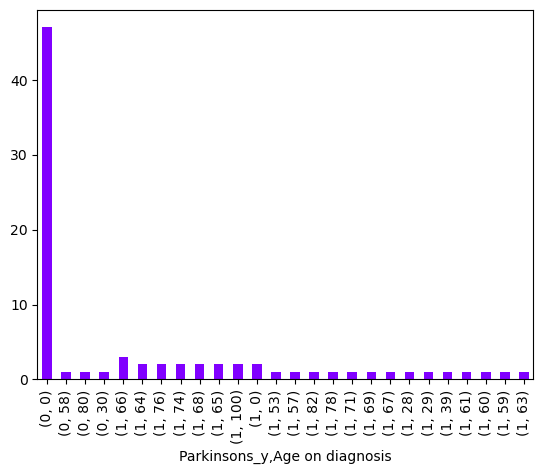

In [33]:
a = full_set1.groupby(full_set1["Parkinsons_y"])['Age on diagnosis'].value_counts()
a.plot(kind = 'bar', colormap = "rainbow")

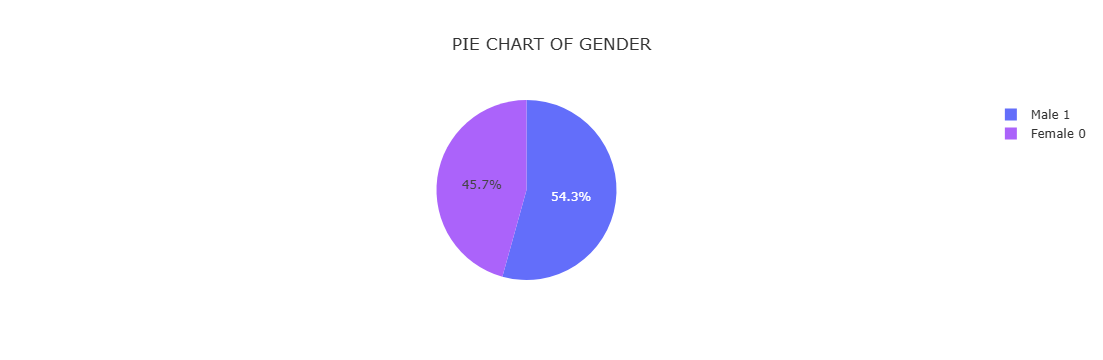

In [34]:
for template in ["ggplot2"]:
    fig = px.pie(values=full_set1["Gender"].value_counts(), labels = full_set1["Gender"].count(),
       names = ["Male 1", "Female 0"], template=template, title="PIE CHART OF GENDER",
                 color_discrete_sequence =['#636EFA', '#AB63FA']  )  
    fig.show()

### New DF without unimportant cols

In [35]:
new_df = full_set1.drop([ 'BirthYear', 'Gender', 
       'DiagnosisYear', 'Parkinsons_x'], axis=1)

### Plot of correlation

C:\Users\veron\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning:

Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior



<Axes: >

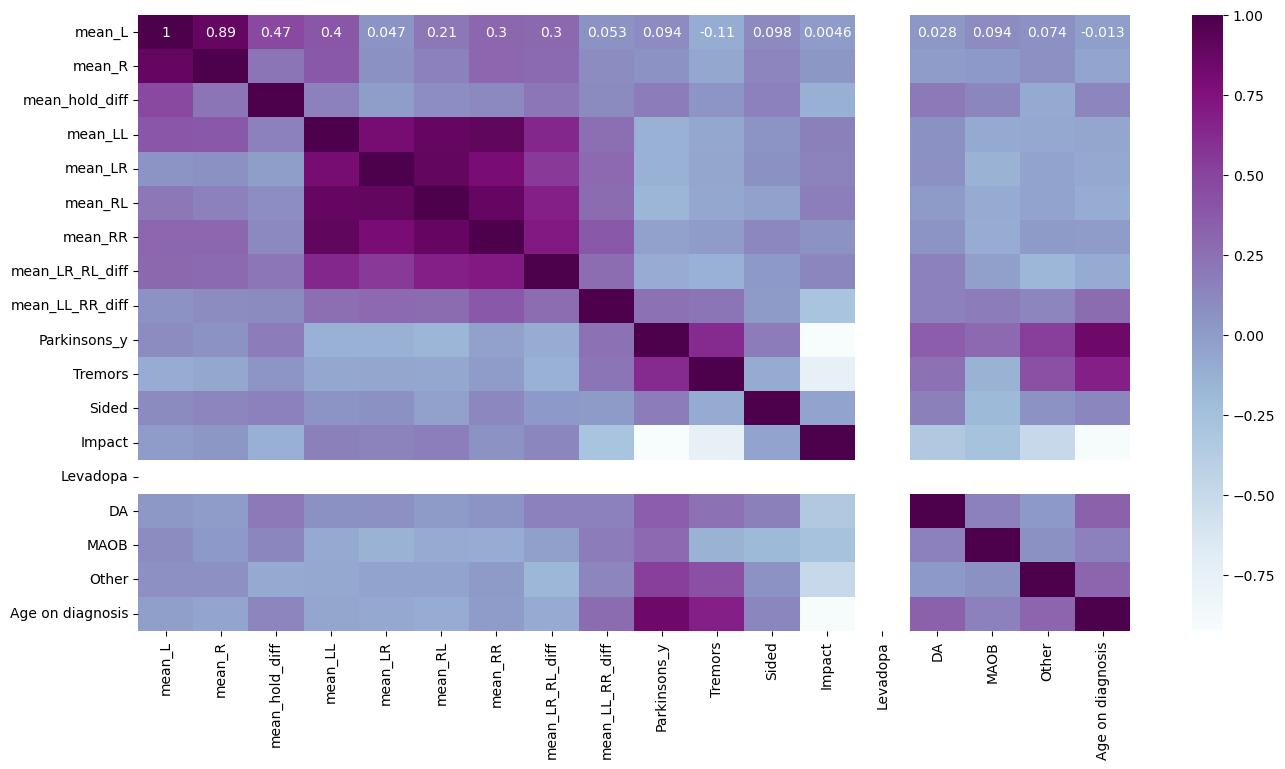

In [36]:
plt.figure(figsize= (16,8))
matrix = new_df.drop(['ID'], axis=1).corr()
sns.heatmap(matrix, cmap="BuPu", annot=True)

### New df for ploting

In [37]:
al = keys.merge(users, on = 'ID', how='left')
al['BirthYear'] = al['BirthYear'].fillna(0)
al['DiagnosisYear'] =al['DiagnosisYear'].fillna(0)

In [38]:
al[["ID", "Parkinsons"]]

ID  Parkinsons
0        0QAZFRHQHW           0
1        0QAZFRHQHW           0
2        0QAZFRHQHW           0
3        0QAZFRHQHW           0
4        0QAZFRHQHW           0
...             ...         ...
4675448  ZWBPPNQCUX           1
4675449  ZWBPPNQCUX           1
4675450  ZWBPPNQCUX           1
4675451  ZWBPPNQCUX           1
4675452  ZWBPPNQCUX           1

[4675453 rows x 2 columns]

In [39]:
al.columns

Index(['ID', 'Date', 'TS', 'Hand', 'HoldTime', 'Direction', 'LatencyTime',
       'FlightTime', 'DateN', 'BirthYear', 'Gender', 'Parkinsons', 'Tremors',
       'DiagnosisYear', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB', 'Other'],
      dtype='object')

In [40]:
stat = al.drop(['Date', 'TS', 'Hand', 'Direction','DateN', 'Gender', 'Tremors',
                'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB', 'Other'], axis =1).groupby(keys['ID']).describe()
stat.reset_index(level=[0], inplace=True) 
stat

ID HoldTime                                                    \
                   count        mean        std   min    25%    50%    75%   
0    0QAZFRHQHW   1321.0  103.300454  31.657192   3.9   85.9  101.6  117.2   
1    1HOEBIGASW     63.0   65.568254  11.910890  44.9   62.5   62.5   78.1   
2    1XNJCXS3EY   1117.0  124.565622  46.931433  15.6   93.8  113.3  144.5   
3    3DIXPRIOSW   1044.0  154.126437  51.352993  15.6  123.6  142.1  187.5   
4    48DZPAJ5NS  11968.0  132.279362  26.569844   0.0  117.2  130.9  148.4   
..          ...      ...         ...        ...   ...    ...    ...    ...   
108  YQSGN9BMVK  28775.0  111.245508  40.767087   3.9   93.8  113.3  132.8   
109  YWMIQIQND3    595.0  123.172941  39.174597  15.6   97.7  121.1  144.5   
110  YYPKGX6B24   2203.0  147.912574  36.261700  15.6  125.0  146.0  164.1   
111  Z2UPVHHGBE  41814.0  130.379727  62.001166   3.9   93.8  140.6  171.9   
112  ZWBPPNQCUX    624.0  102.068429  33.538174   0.0   78.1  109.4  113.3   

            LatencyTime  ... FlightTime        Parkinsons                      \
        max       count  ...        75%    max      count mean  std  min  25%   
0     683.6      1321.0  ...    421.900  793.0     1321.0  0.0  0.0  0.0  0.0   
1      93.8        63.0  ...    571.300  718.8       63.0  0.0  0.0  0.0  0.0   
2     357.4      1117.0  ...    271.500  468.8     1117.0  0.0  0.0  0.0  0.0   
3     355.5      1044.0  ...    484.400  703.1     1044.0  0.0  0.0  0.0  0.0   
4     335.9     11968.0  ...    253.375  492.2    11968.0  1.0  0.0  1.0  1.0   
..      ...         ...  ...        ...    ...        ...  ...  ...  ...  ...   
108  1746.1     28775.0  ...    250.000  798.8    28775.0  0.0  0.0  0.0  0.0   
109   296.9       595.0  ...    248.050  496.1      595.0  1.0  0.0  1.0  1.0   
110   500.0      2203.0  ...    460.900  777.3     2203.0  0.0  0.0  0.0  0.0   
111   750.0     41814.0  ...    265.600  796.9    41814.0  1.0  0.0  1.0  1.0   
112   347.7       624.0  ...    296.900  421.9      624.0  1.0  0.0  1.0  1.0   

                    
     50%  75%  max  
0    0.0  0.0  0.0  
1    0.0  0.0  0.0  
2    0.0  0.0  0.0  
3    0.0  0.0  0.0  
4    1.0  1.0  1.0  
..   ...  ...  ...  
108  0.0  0.0  0.0  
109  1.0  1.0  1.0  
110  0.0  0.0  0.0  
111  1.0  1.0  1.0  
112  1.0  1.0  1.0  

[113 rows x 33 columns]

### Plot Hold Time for typing, only with leaft hand on random user

In [41]:
l = al.loc[np.where(al['Hand']=="L")][["ID", "HoldTime", "Parkinsons"]]
l.reset_index(level=[0], inplace=True) 

In [203]:
l

index          ID  HoldTime  Parkinsons
0              0  0QAZFRHQHW      78.1           0
1              1  0QAZFRHQHW      78.1           0
2              2  0QAZFRHQHW      62.5           0
3              3  0QAZFRHQHW      93.8           0
4              6  0QAZFRHQHW     109.4           0
...          ...         ...       ...         ...
2203435  4675448  ZWBPPNQCUX     109.4           1
2203436  4675449  ZWBPPNQCUX     107.4           1
2203437  4675450  ZWBPPNQCUX     109.4           1
2203438  4675451  ZWBPPNQCUX     138.7           1
2203439  4675452  ZWBPPNQCUX     111.3           1

[2203440 rows x 4 columns]

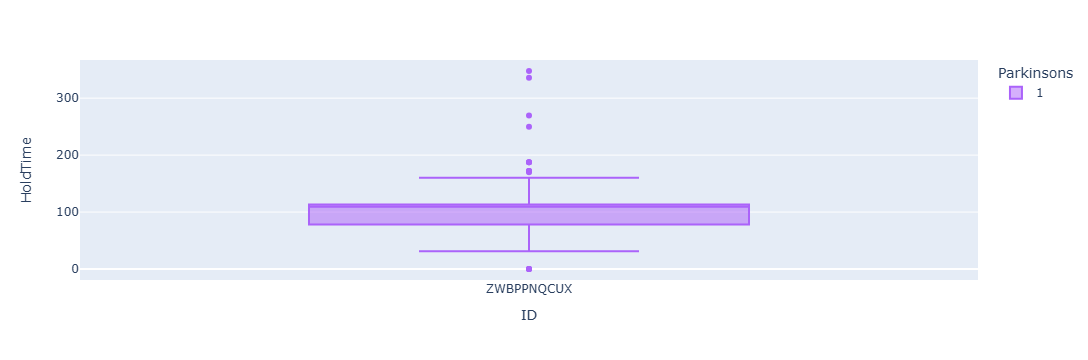

<Figure size 1600x800 with 0 Axes>

In [42]:
one_u= l.loc[np.where(l['ID'] == "ZWBPPNQCUX")]
plt.figure(figsize= (16,8))
px.box(one_u, x=one_u['ID'], y=one_u['HoldTime'],
       color=one_u['Parkinsons'], color_discrete_sequence= ['#AB63FA'])

In [198]:
id_list =[]
for el in full_set1["ID"]:
    id_list.append(el)

In [1]:
# data=l

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 7), sharex=False, sharey=False)
# axes = id_list
# cols= l["HoldTime"]

# datan = pd.DataFrame
# for  ax in  id_list:
#     # datan = data[ax] 
#     sns.boxplot(data=data, x=ax, y=cols, bins=20, kde=True,  legend=True,
#                  fill=True, common_norm=False, palette ="BuPu", alpha=.6, linewidth=0)
#     ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
# fig.tight_layout()
# plt.show()

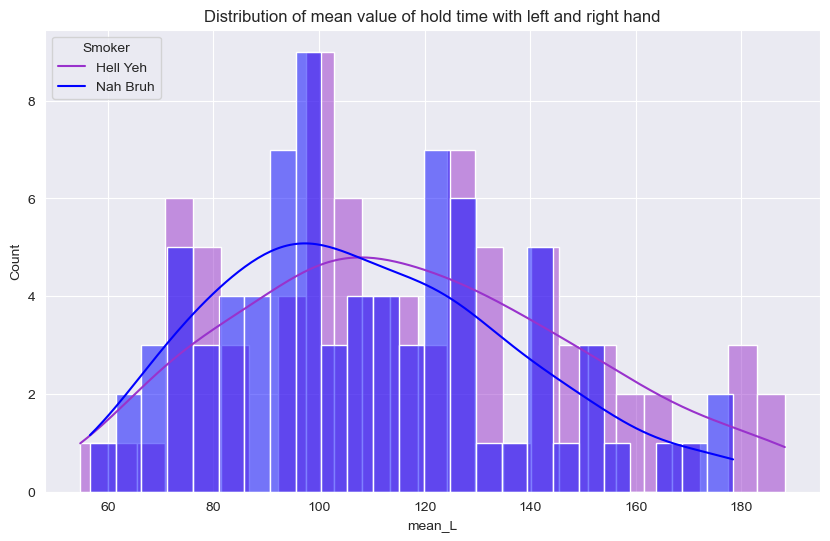

In [172]:
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))

sns.histplot(new_df['mean_L'], bins=25, kde=True, color= "darkorchid", legend=True).set(title='Distribution of mean value of hold time with left and right hand')
sns.histplot(new_df['mean_R'], bins=25, kde=True, color= "b", legend=True)
plt.legend(title='Smoker', loc='upper left', labels=['Hell Yeh', 'Nah Bruh'])
plt.show()

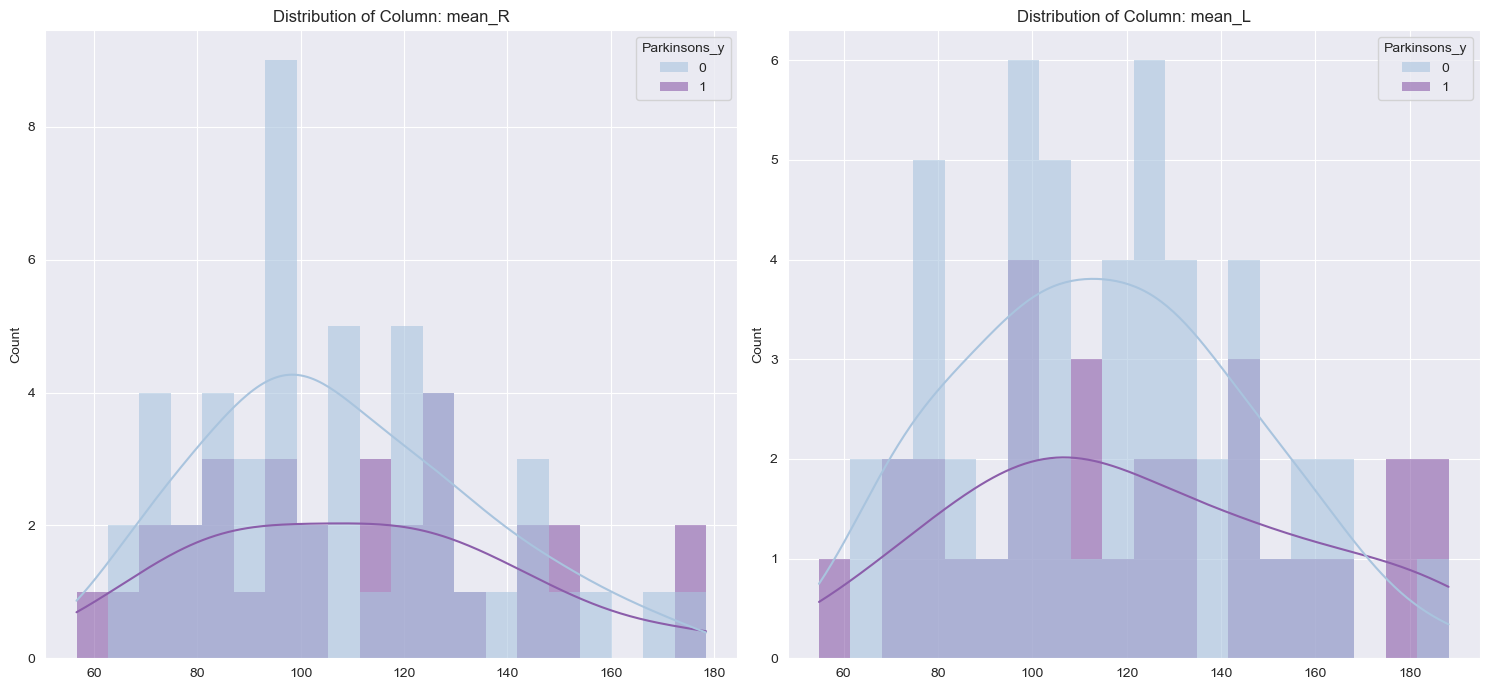

In [187]:
data=new_df.drop(['ID', "mean_RR", "mean_LL", "mean_RL", "mean_LR", 'mean_hold_diff', 'mean_LR_RL_diff', 'mean_LL_RR_diff',
                  'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis'], axis=1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=False)
axes = axes.ravel()
cols= ["mean_R", "mean_L"]

datan = pd.DataFrame
for col, ax in zip(cols, axes):
    datan = data[col] 
    sns.histplot(data=data, x=col, ax=ax, bins=20, kde=True,  legend=True, hue="Parkinsons_y", 
                 fill=True, common_norm=False, palette ="BuPu", alpha=.6, linewidth=0)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

['mean_RR', 'mean_LL', 'mean_RL', 'mean_LR']


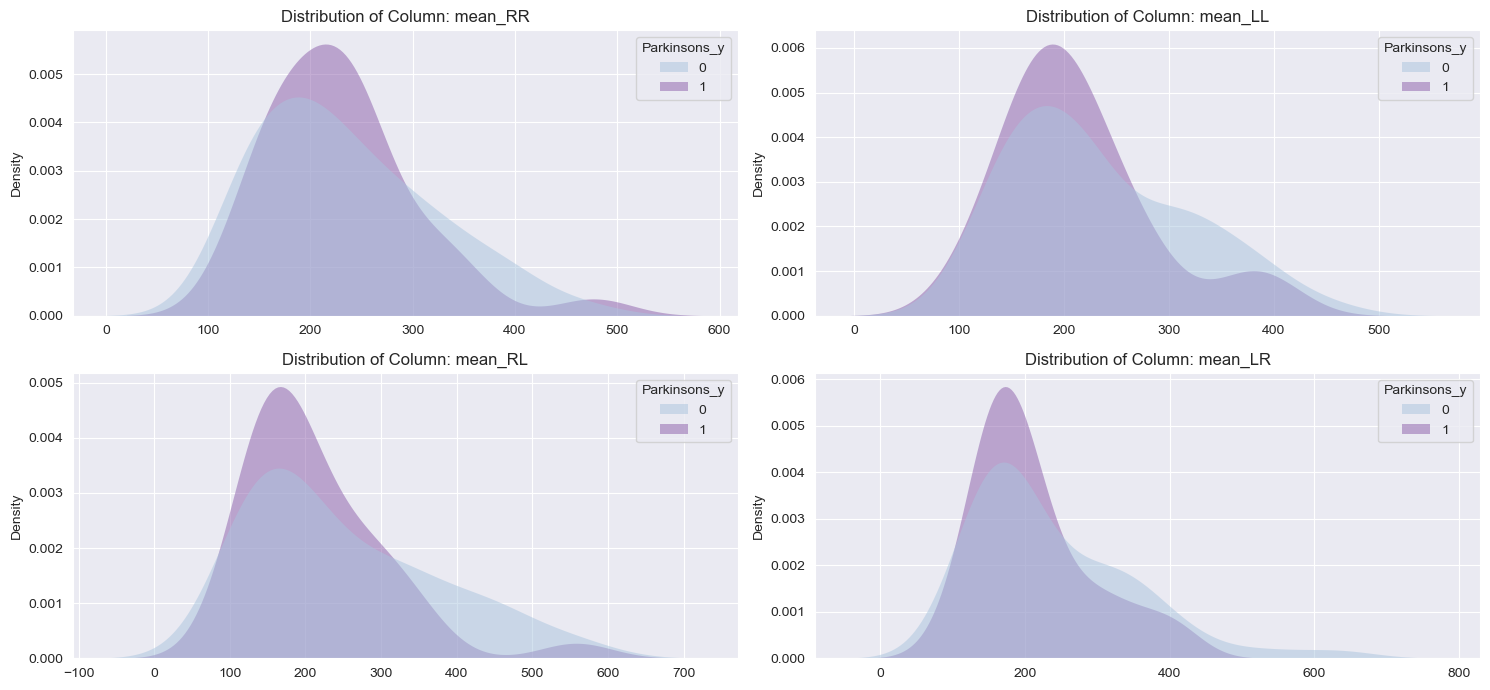

In [161]:
data=new_df.drop(['ID', 'mean_L', 'mean_R', 'mean_hold_diff', 'mean_LR_RL_diff', 'mean_LL_RR_diff',
                  'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis'], axis=1)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), sharex=False, sharey=False)
axes = axes.ravel()
cols= ["mean_RR", "mean_LL", "mean_RL", "mean_LR"]
print(cols)
datan = pd.DataFrame
for col, ax in zip(cols, axes):
    datan = data[col] 
    sns.kdeplot(data=data, x=col, ax=ax, hue="Parkinsons_y",  fill=True, common_norm=False, palette ="BuPu", alpha=.5, linewidth=0)
    ax.set(title=f'Distribution of Column: {col}', xlabel=None)
    
fig.tight_layout()
plt.show()

## Bar plot  for important columns

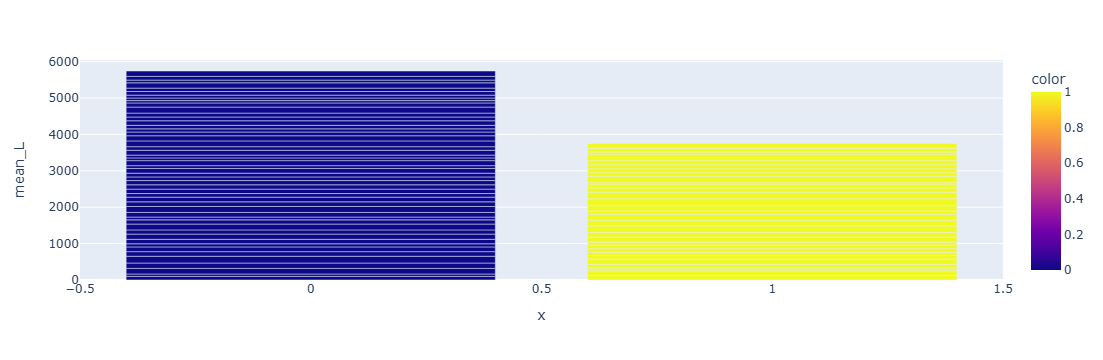

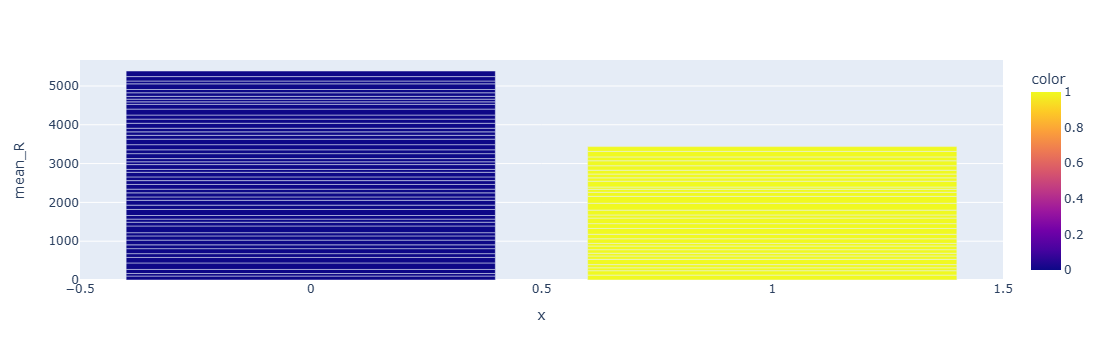

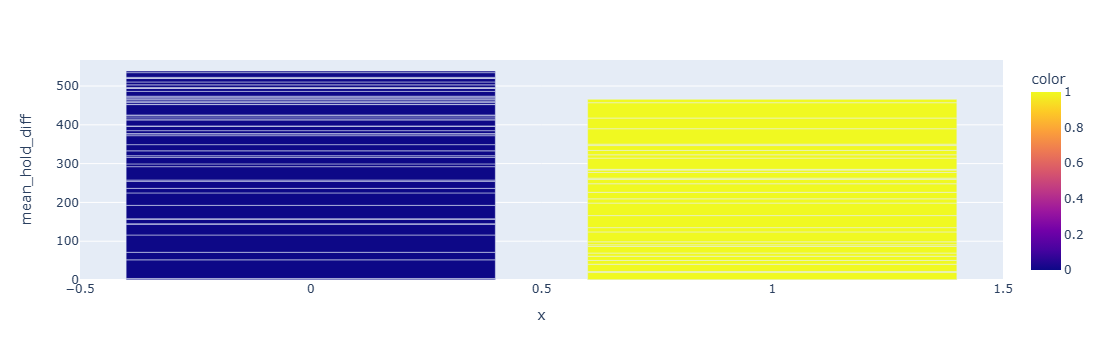

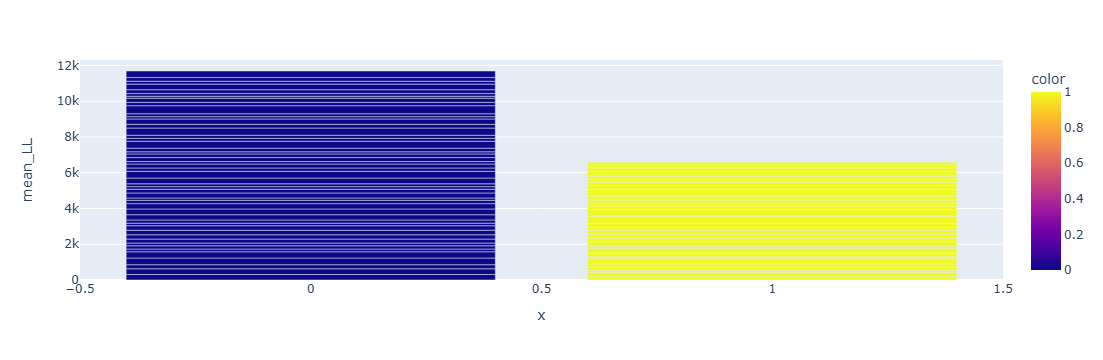

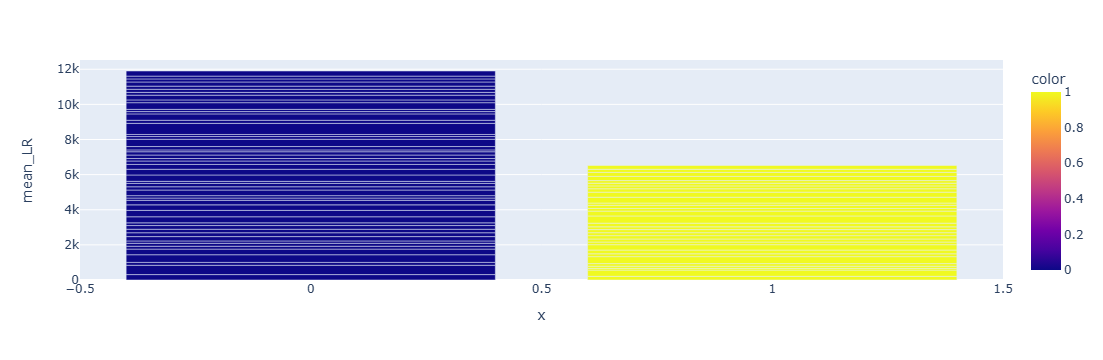

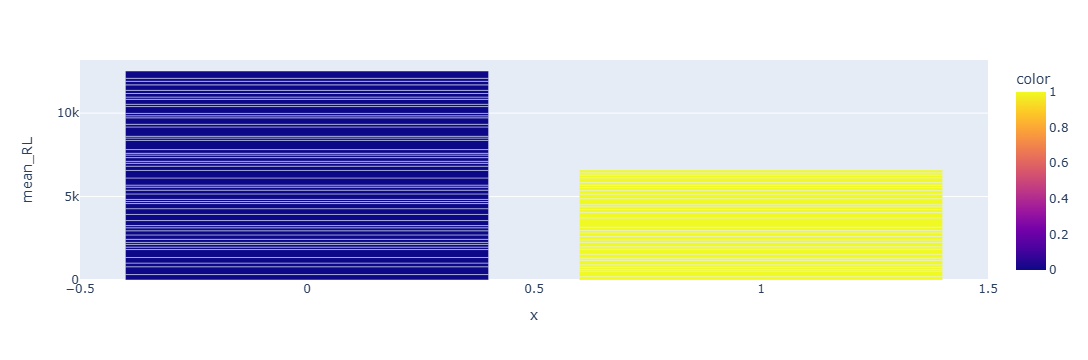

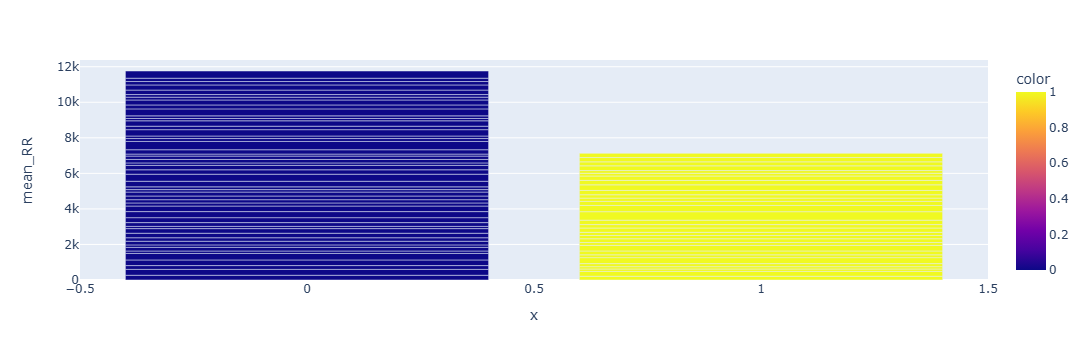

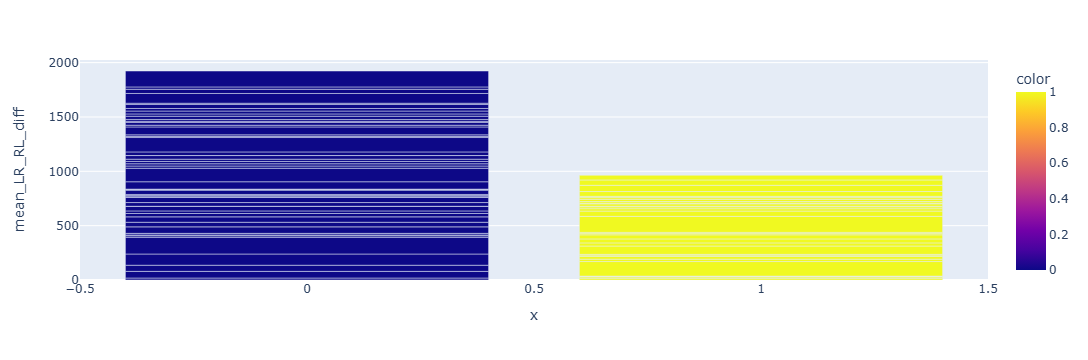

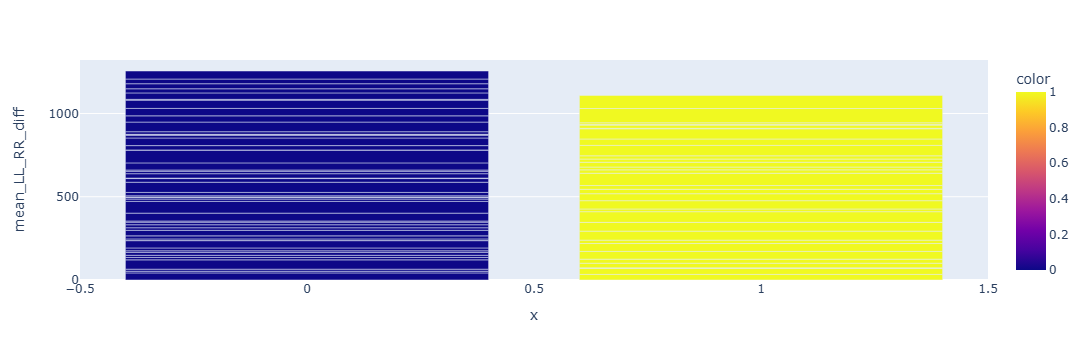

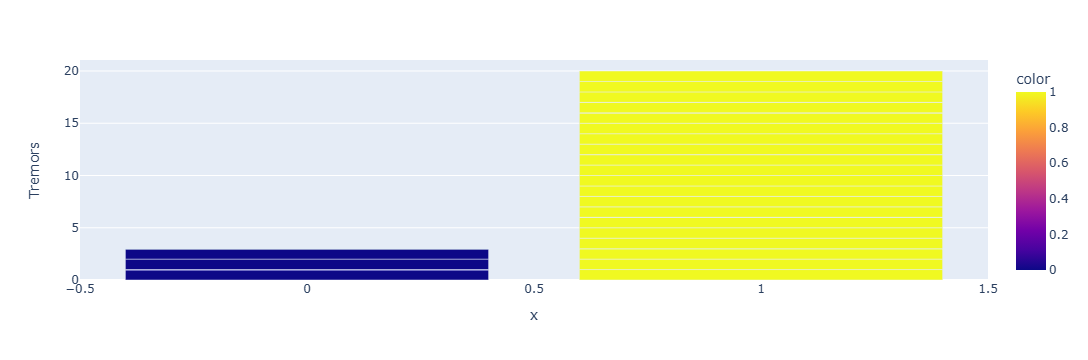

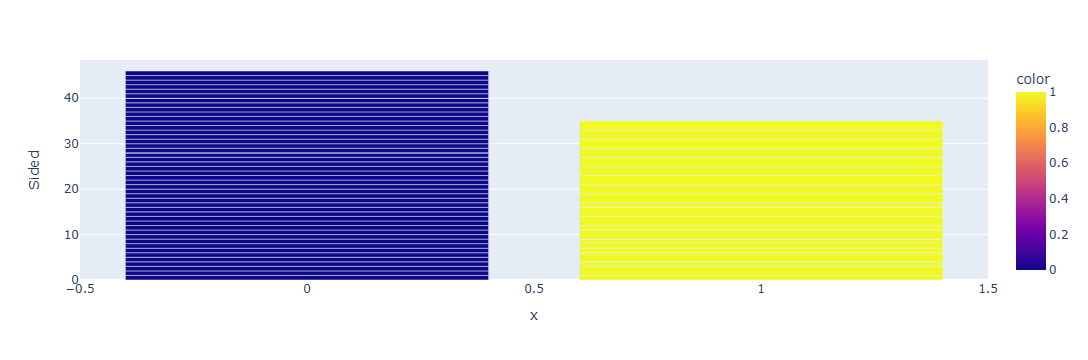

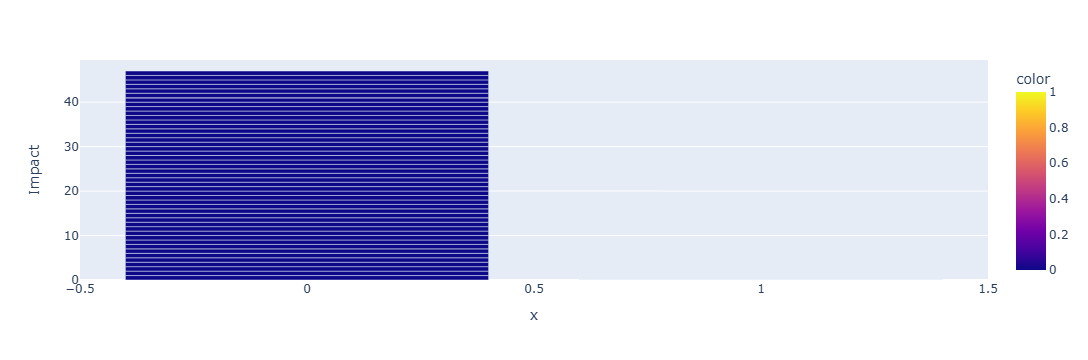

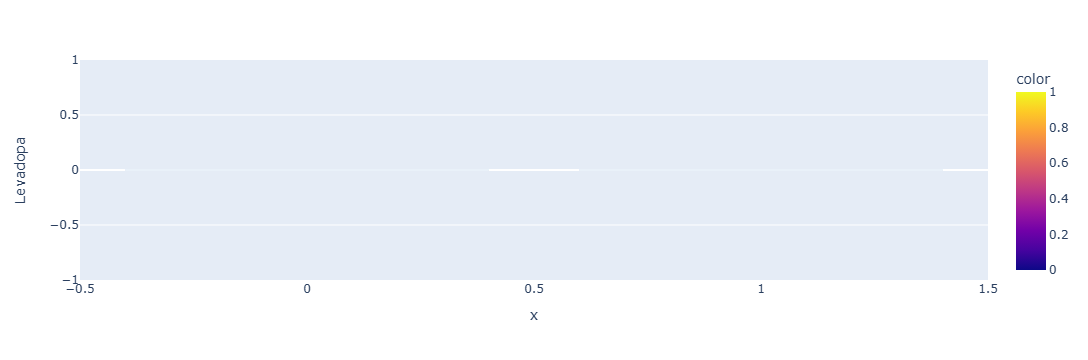

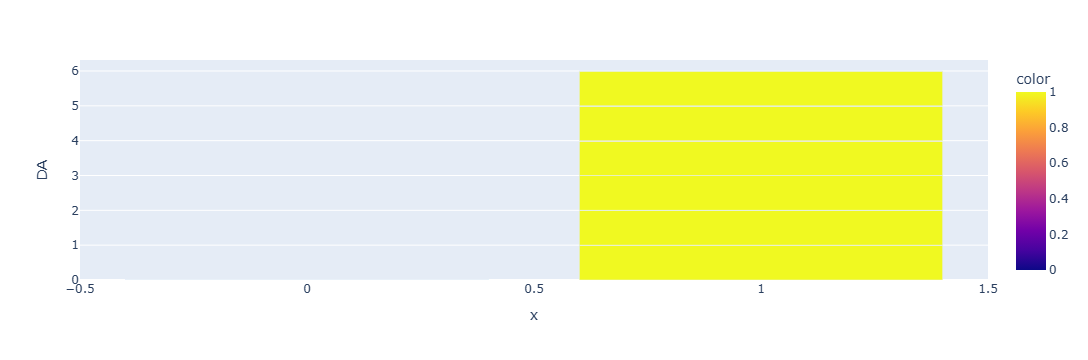

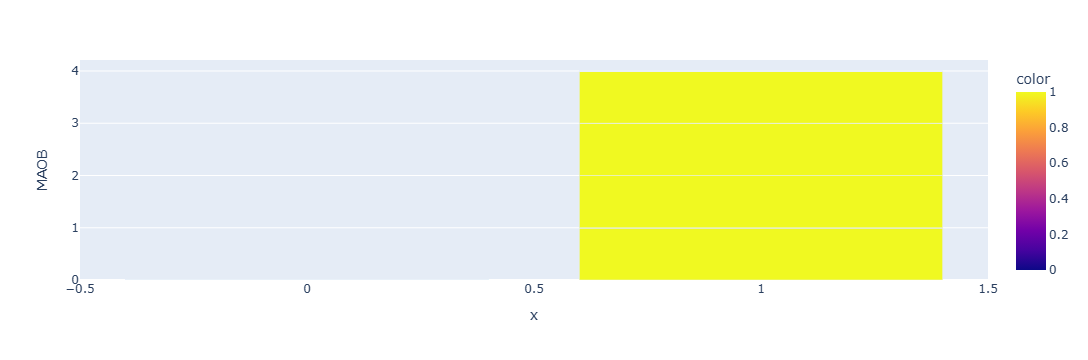

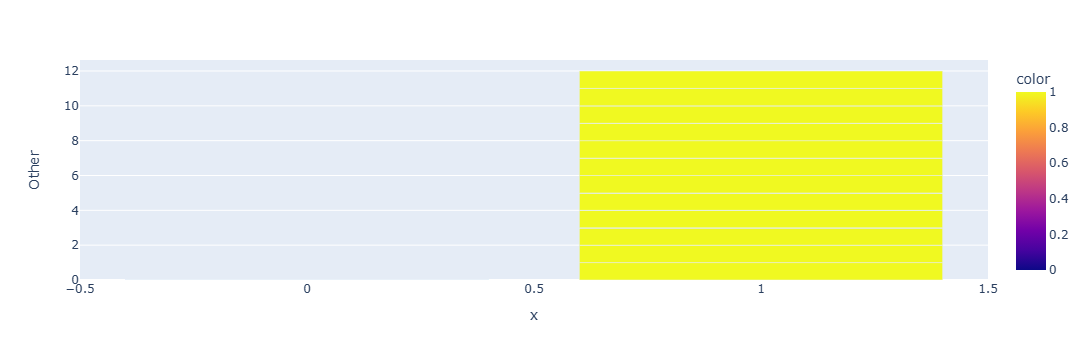

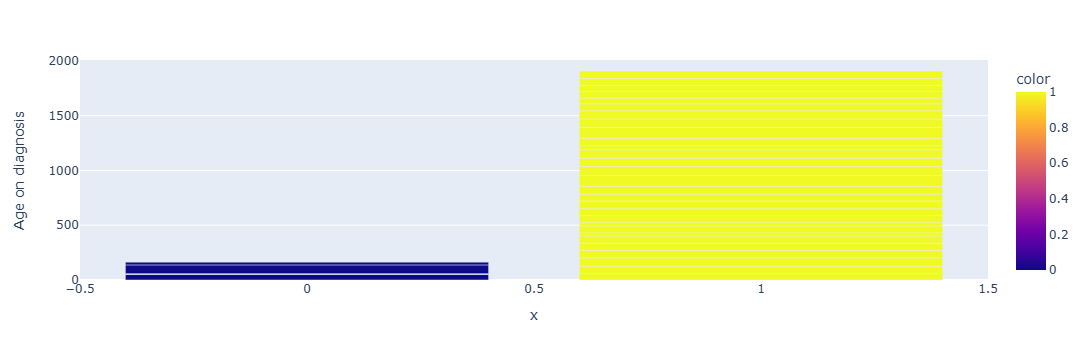

In [45]:
#Da se trgnat tie shto nemaat smisla
for data in [ 'mean_L', 'mean_R', 'mean_hold_diff', 'mean_LL', 'mean_LR',
       'mean_RL', 'mean_RR', 'mean_LR_RL_diff', 'mean_LL_RR_diff', 'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis']:
    fig = px.bar(full_set1, x=new_df['Parkinsons_y'],
       y=data,
       color=new_df['Parkinsons_y'])  
    fig.show()

### Box plot on HoldTime with Leaft Hand  (ama ne saka, dosredi go)

In [46]:
# plt.figure(figsize= (16,8))

# us = new_df["ID"].unique().tolist()
# for el in us:
#     fig = px.box(l, x=el, y =l.loc[np.where(l['ID'] == el)]["HoldTime"], color=l['Parkinsons'])
#     fig.show()

### Histplot on some data cols

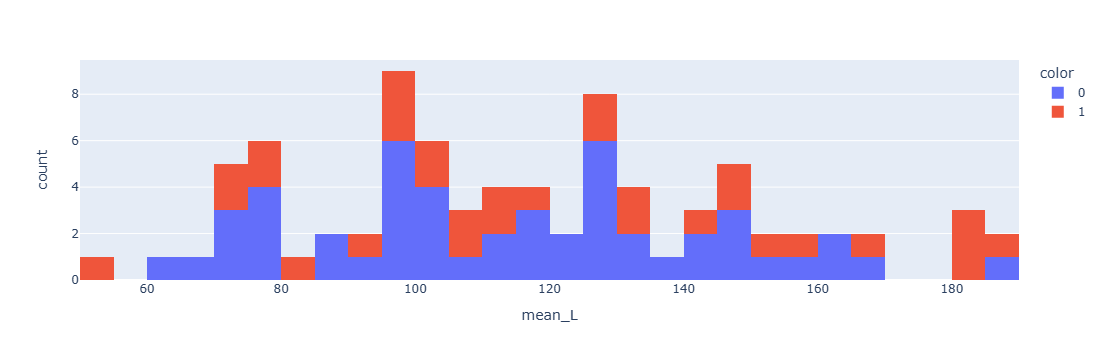

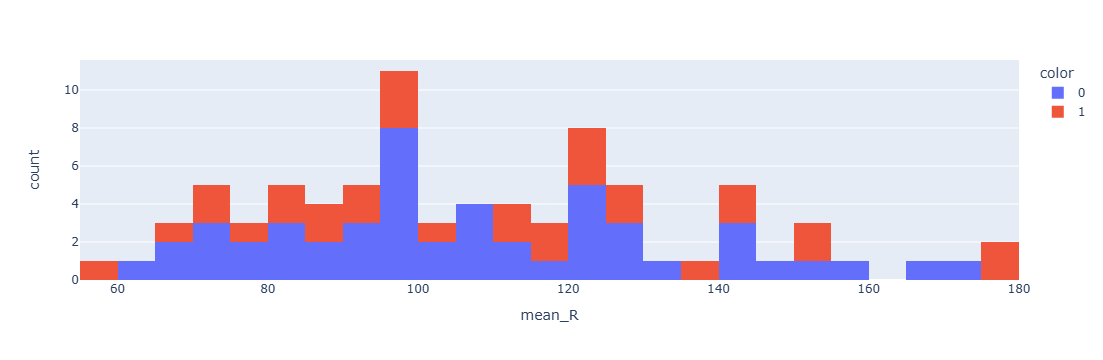

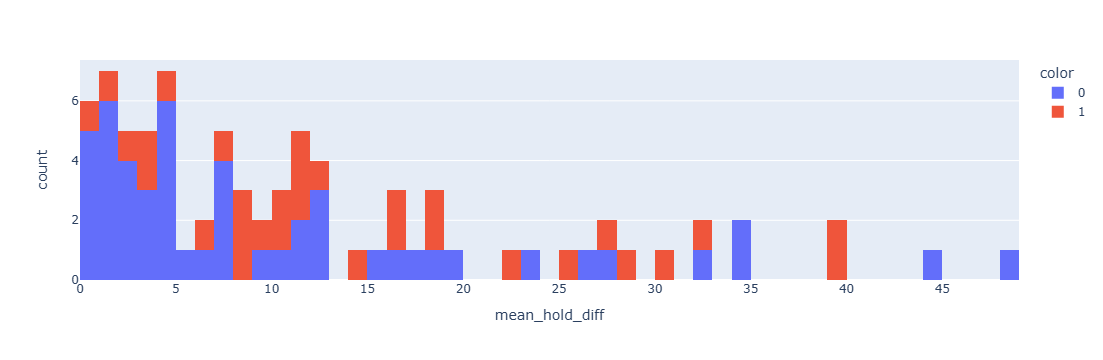

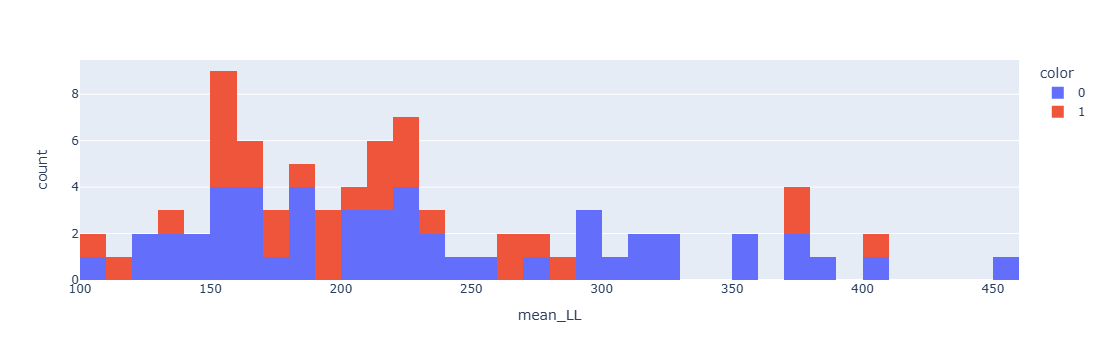

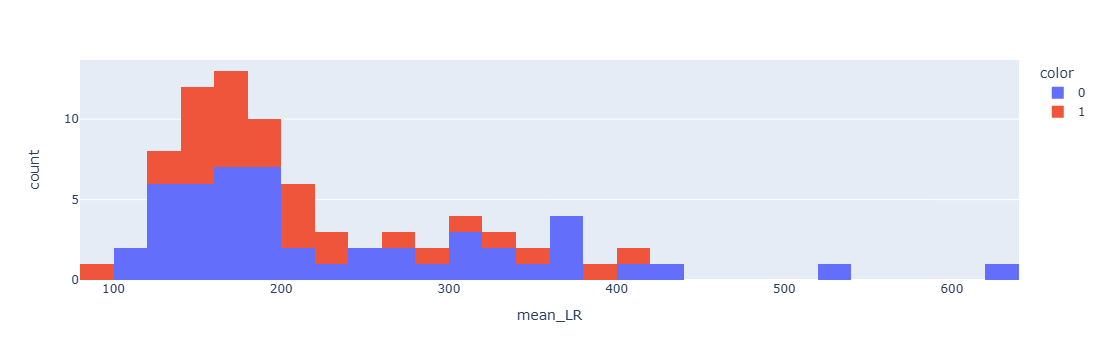

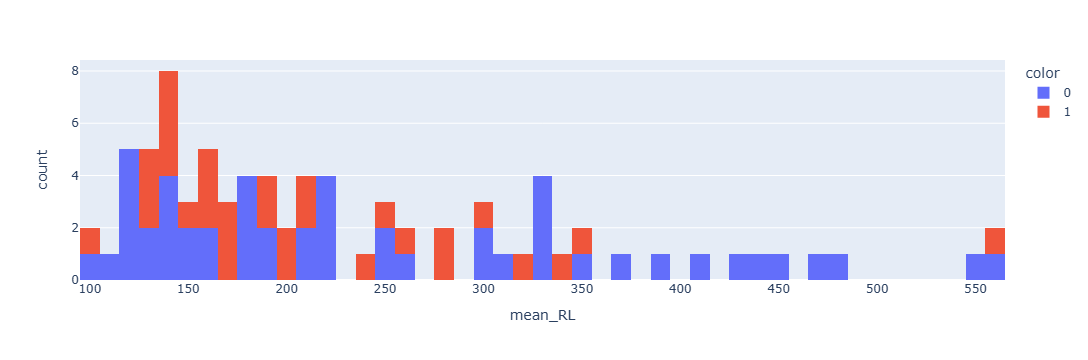

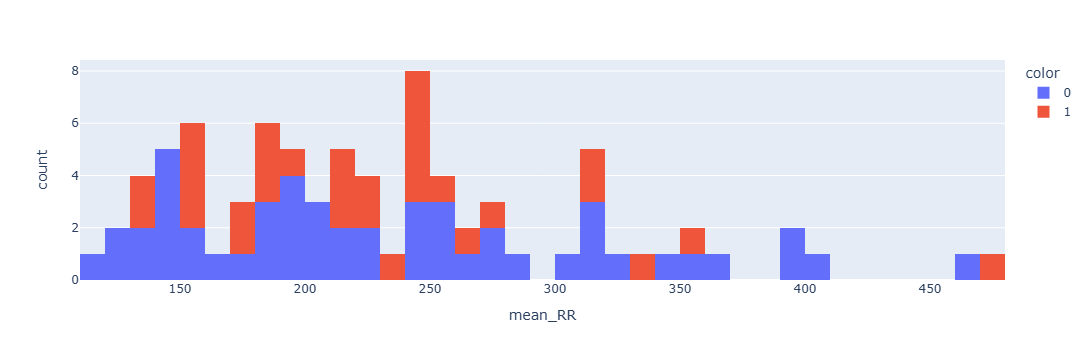

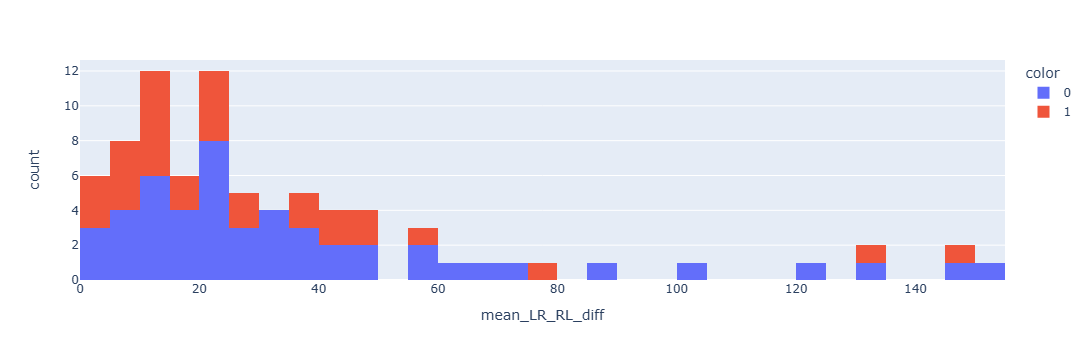

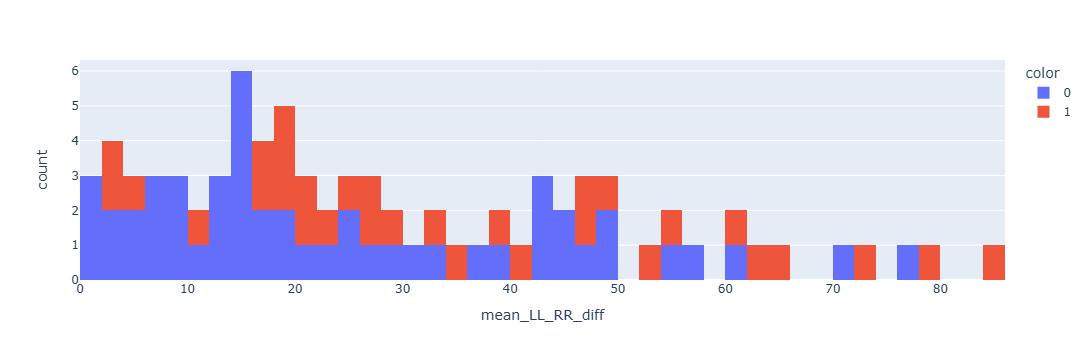

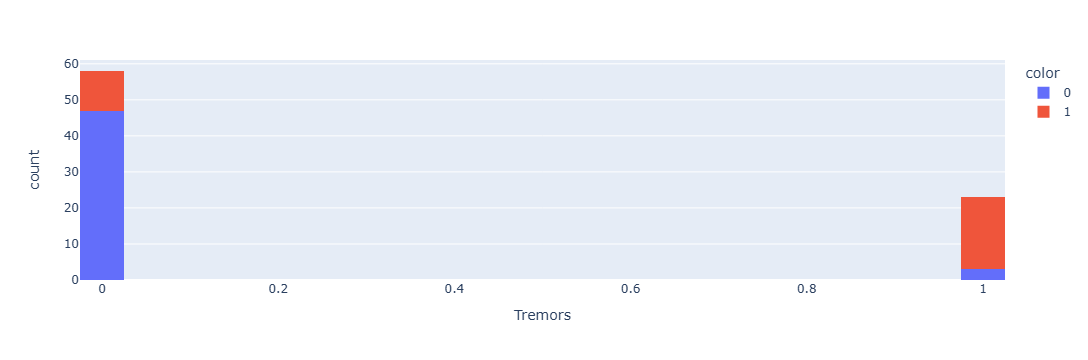

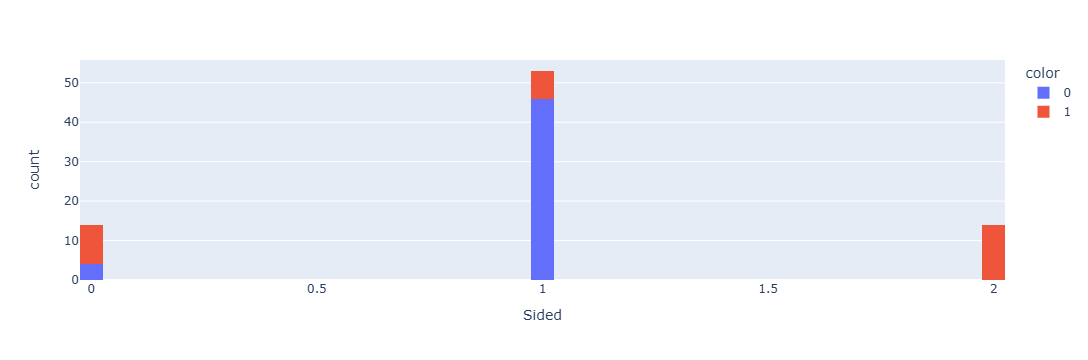

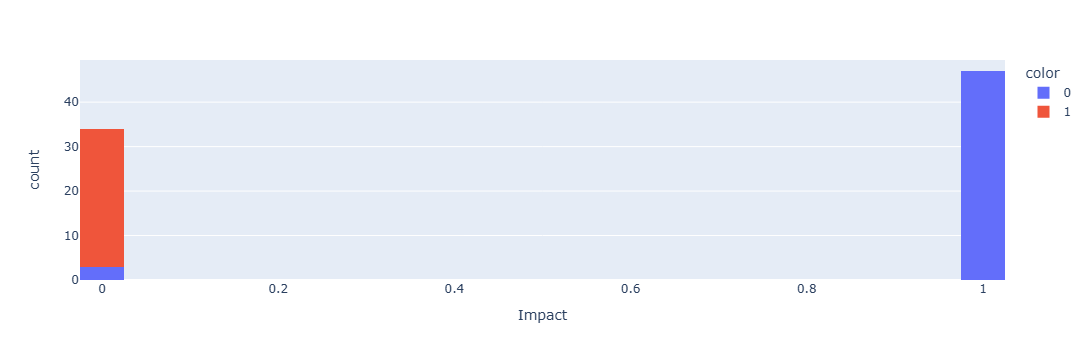

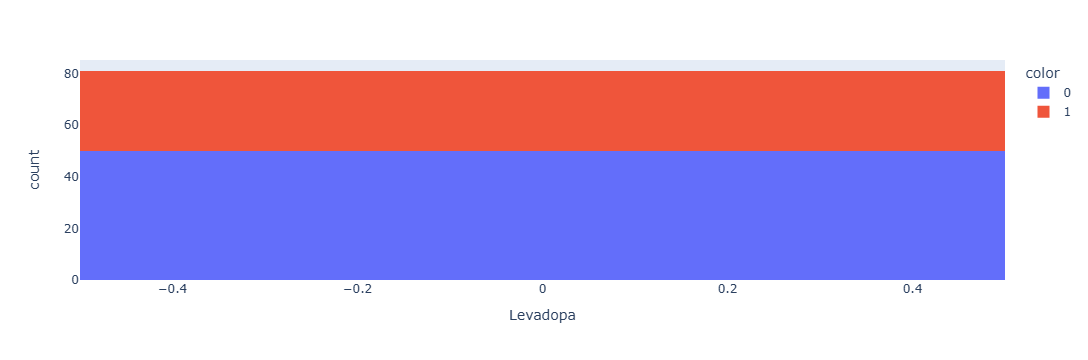

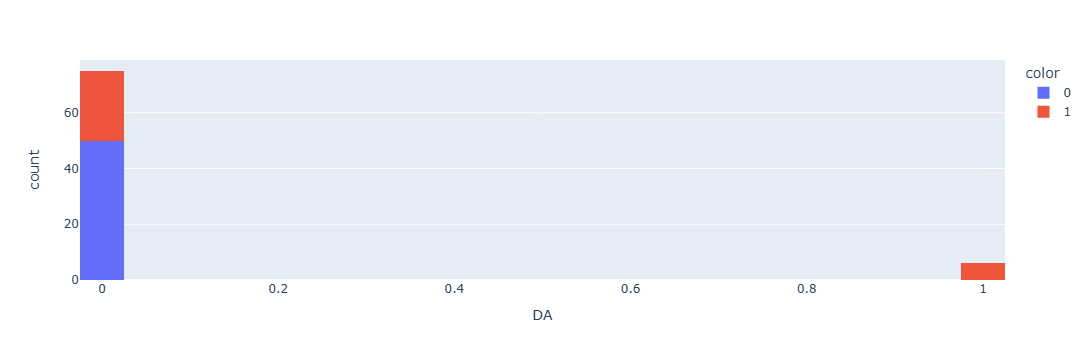

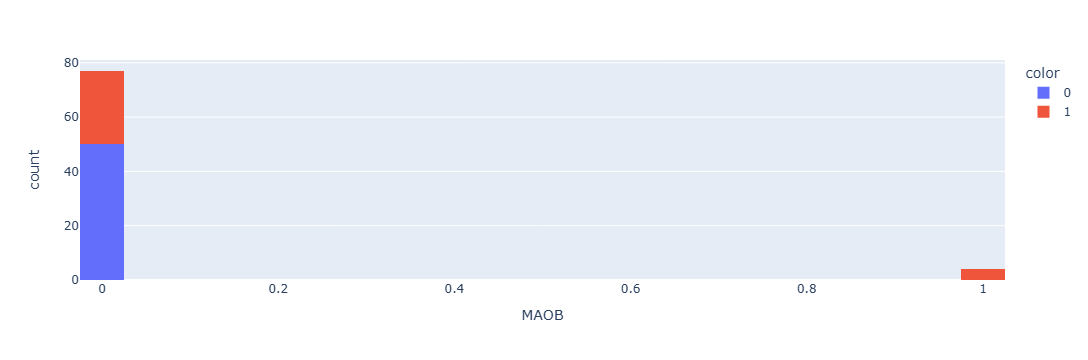

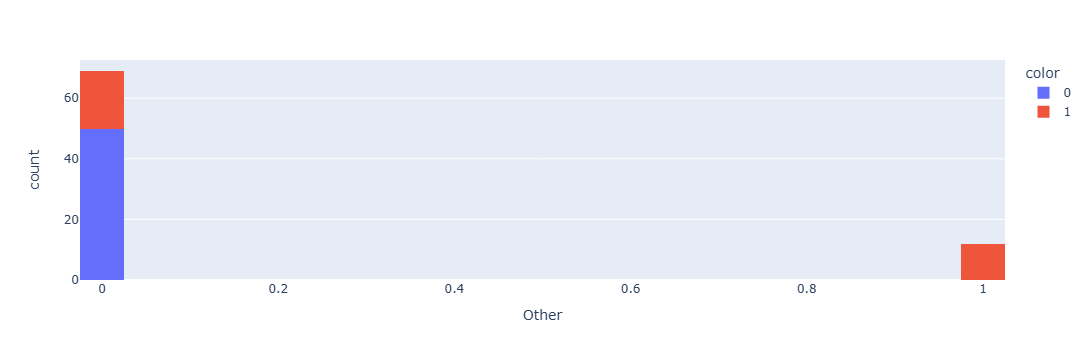

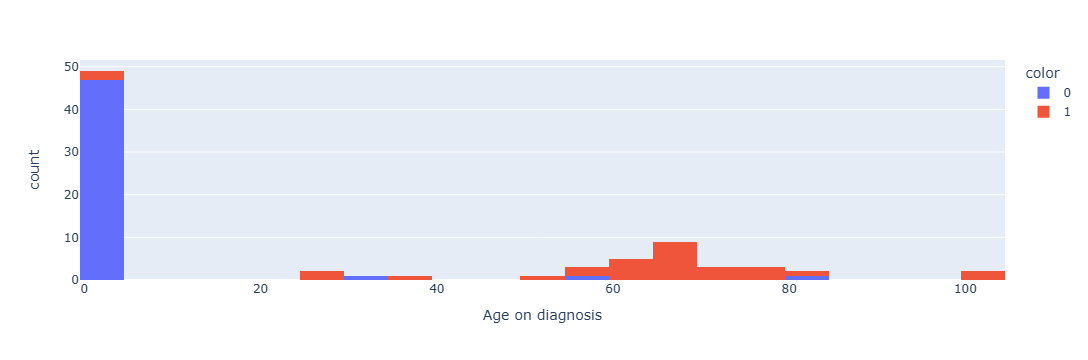

In [47]:
#Da se trgnat tie shto nemaat smisla
for data in [ 'mean_L', 'mean_R', 'mean_hold_diff', 'mean_LL', 'mean_LR',
       'mean_RL', 'mean_RR', 'mean_LR_RL_diff', 'mean_LL_RR_diff', 'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis']:
    fig = px.histogram(full_set1,
       x=data,
       color=new_df['Parkinsons_y'], nbins=50)  
    fig.show()

### Checking for structure of data

In [48]:
a = full_set1.groupby(full_set1["Parkinsons_y"])['Tremors'].value_counts()
# a.plot(kind = 'bar', colormap = "Accent" )
a

Parkinsons_y  Tremors
0             0          47
              1           3
1             1          20
              0          11
Name: count, dtype: int64

In [49]:
full_set1.groupby(full_set1["Parkinsons_y"])['Sided'].value_counts()

Parkinsons_y  Sided
0             1        46
              0         4
1             2        14
              0        10
              1         7
Name: count, dtype: int64

In [50]:
full_set1.groupby(full_set1["Parkinsons_y"])['Impact'].value_counts()

Parkinsons_y  Impact
0             1         47
              0          3
1             0         31
Name: count, dtype: int64

In [51]:
full_set1.groupby(full_set1["Parkinsons_y"])['Levadopa'].value_counts()

Parkinsons_y  Levadopa
0             0           50
1             0           31
Name: count, dtype: int64

In [52]:
full_set1.groupby(full_set1["Parkinsons_y"])['DA'].value_counts()

Parkinsons_y  DA
0             0     50
1             0     25
              1      6
Name: count, dtype: int64

In [53]:
full_set1.groupby(full_set1["Parkinsons_y"])['MAOB'].value_counts()

Parkinsons_y  MAOB
0             0       50
1             0       27
              1        4
Name: count, dtype: int64

In [54]:
full_set1.groupby(full_set1["Parkinsons_y"])['Other'].value_counts()

Parkinsons_y  Other
0             0        50
1             0        19
              1        12
Name: count, dtype: int64

In [55]:
new_df['Tremors'].value_counts()

Tremors
0    58
1    23
Name: count, dtype: int64

### Visualisating on 1 random positive user

In [56]:
user1 = al.loc[np.where(al['ID']=="ZWBPPNQCUX")]
user1

ID    Date            TS Hand  HoldTime Direction  \
4674829  ZWBPPNQCUX  160802  08:54:04.861    R     146.5        LR   
4674830  ZWBPPNQCUX  160803  08:52:55.551    R     109.4        LR   
4674831  ZWBPPNQCUX  160804  17:06:49.551    R      78.1        LR   
4674832  ZWBPPNQCUX  160804  17:06:51.473    R      78.1        LR   
4674833  ZWBPPNQCUX  160805  08:22:02.520    R     109.4        LR   
...             ...     ...           ...  ...       ...       ...   
4675448  ZWBPPNQCUX  161230  21:43:22.477    L     109.4        RL   
4675449  ZWBPPNQCUX  161231  08:35:18.164    L     107.4        LL   
4675450  ZWBPPNQCUX  161231  08:35:27.510    L     109.4        LL   
4675451  ZWBPPNQCUX  161231  08:35:27.979    L     138.7        LL   
4675452  ZWBPPNQCUX  161231  09:05:25.348    L     111.3        RL   

         LatencyTime  FlightTime      DateN BirthYear  Gender  Parkinsons  \
4674829        386.7       304.7 2016-08-02      1942       1           1   
4674830        421.9       328.1 2016-08-03      1942       1           1   
4674831        468.8       363.3 2016-08-04      1942       1           1   
4674832        406.3       281.3 2016-08-04      1942       1           1   
4674833        375.0       281.3 2016-08-05      1942       1           1   
...              ...         ...        ...       ...     ...         ...   
4675448        250.0       125.0 2016-12-30      1942       1           1   
4675449        439.5       330.1 2016-12-31      1942       1           1   
4675450        390.6       281.3 2016-12-31      1942       1           1   
4675451        439.5       330.1 2016-12-31      1942       1           1   
4675452        482.4       375.0 2016-12-31      1942       1           1   

         Tremors DiagnosisYear  Sided  Impact  Levadopa  DA  MAOB  Other  
4674829        0          2016      1       0         1   0     0      0  
4674830        0          2016      1       0         1   0     0      0  
4674831        0          2016      1       0         1   0     0      0  
4674832        0          2016      1       0         1   0     0      0  
4674833        0          2016      1       0         1   0     0      0  
...          ...           ...    ...     ...       ...  ..   ...    ...  
4675448        0          2016      1       0         1   0     0      0  
4675449        0          2016      1       0         1   0     0      0  
4675450        0          2016      1       0         1   0     0      0  
4675451        0          2016      1       0         1   0     0      0  
4675452        0          2016      1       0         1   0     0      0  

[624 rows x 20 columns]

C:\Users\veron\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



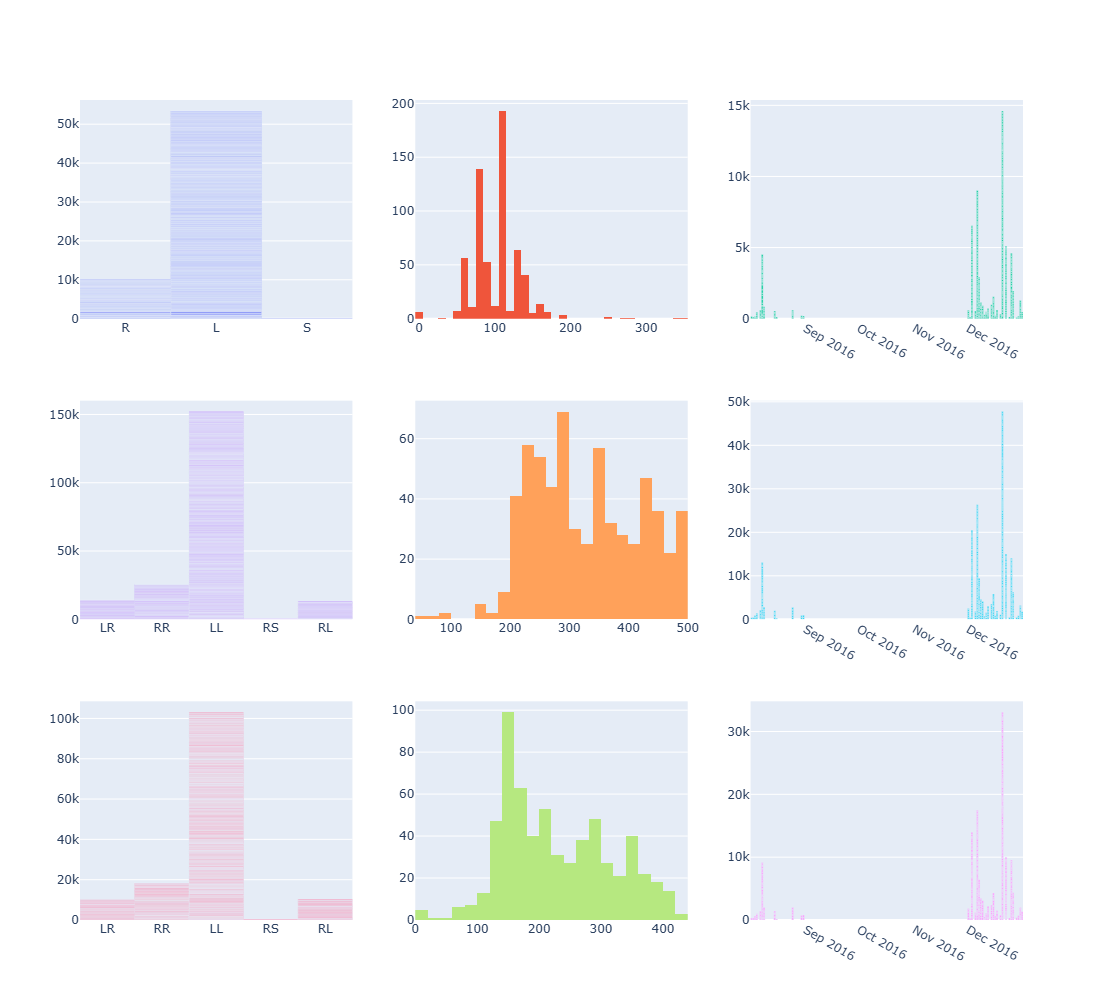

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=3, cols=3,
    specs=[[{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}]])

fig.add_trace(go.Bar(x=user1['Hand'], y=user1['HoldTime']),
              row=1, col=1)
fig.add_trace(go.Histogram(x=user1['HoldTime']),
              row=1, col=2)
fig.add_trace(go.Bar(x=user1['DateN'], y=user1['HoldTime']),
              row=1, col=3)


fig.add_trace(go.Bar(x=user1['Direction'], y=user1['LatencyTime']),
              row=2, col=1)
fig.add_trace(go.Histogram(x=user1['LatencyTime']),
              row=2, col=2)
fig.add_trace(go.Bar(x=user1['DateN'], y=user1['LatencyTime']),
              row=2, col=3)

fig.add_trace(go.Bar(x=user1['Direction'], y=user1['FlightTime']),
              row=3, col=1)
fig.add_trace(go.Histogram(x=user1['FlightTime']),
              row=3, col=2)
fig.add_trace(go.Bar(x=user1['DateN'], y=user1['FlightTime']),
              row=3, col=3)


fig.update_layout(height=1000, showlegend=False)

fig.show()
# dodaj naslovi, lables i podsredi gi

### Visualisating on 1 random negative user

In [58]:
user2 = al.loc[np.where(al['ID']=="0QAZFRHQHW")]
user2

ID    Date            TS Hand  HoldTime Direction  LatencyTime  \
0     0QAZFRHQHW  160916  19:20:43.891    L      78.1        LL        312.5   
1     0QAZFRHQHW  160916  19:20:44.344    L      78.1        LL        453.1   
2     0QAZFRHQHW  160916  19:20:44.742    L      62.5        LL        414.1   
3     0QAZFRHQHW  160916  19:20:45.516    L      93.8        LL        742.2   
4     0QAZFRHQHW  160916  19:20:46.047    R     101.6        LR        523.4   
...          ...     ...           ...  ...       ...       ...          ...   
1316  0QAZFRHQHW  161011  08:19:56.037    R      95.7        LR        572.3   
1317  0QAZFRHQHW  161011  08:19:56.203    R      76.2        RR        185.5   
1318  0QAZFRHQHW  161011  08:20:01.742    L     138.7        RL        427.7   
1319  0QAZFRHQHW  161011  08:20:01.992    R     101.6        LR        287.1   
1320  0QAZFRHQHW  161011  08:20:02.324    R      82.0        RR        351.6   

      FlightTime      DateN BirthYear  Gender  Parkinsons  Tremors  \
0          257.8 2016-09-16      1959       0           0        0   
1          375.0 2016-09-16      1959       0           0        0   
2          335.9 2016-09-16      1959       0           0        0   
3          679.7 2016-09-16      1959       0           0        0   
4          429.7 2016-09-16      1959       0           0        0   
...          ...        ...       ...     ...         ...      ...   
1316       445.3 2016-10-11      1959       0           0        0   
1317        89.8 2016-10-11      1959       0           0        0   
1318       310.5 2016-10-11      1959       0           0        0   
1319       148.4 2016-10-11      1959       0           0        0   
1320       250.0 2016-10-11      1959       0           0        0   

     DiagnosisYear  Sided  Impact  Levadopa  DA  MAOB  Other  
0                0      1       1         0   0     0      0  
1                0      1       1         0   0     0      0  
2                0      1       1         0   0     0      0  
3                0      1       1         0   0     0      0  
4                0      1       1         0   0     0      0  
...            ...    ...     ...       ...  ..   ...    ...  
1316             0      1       1         0   0     0      0  
1317             0      1       1         0   0     0      0  
1318             0      1       1         0   0     0      0  
1319             0      1       1         0   0     0      0  
1320             0      1       1         0   0     0      0  

[1321 rows x 20 columns]

C:\Users\veron\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



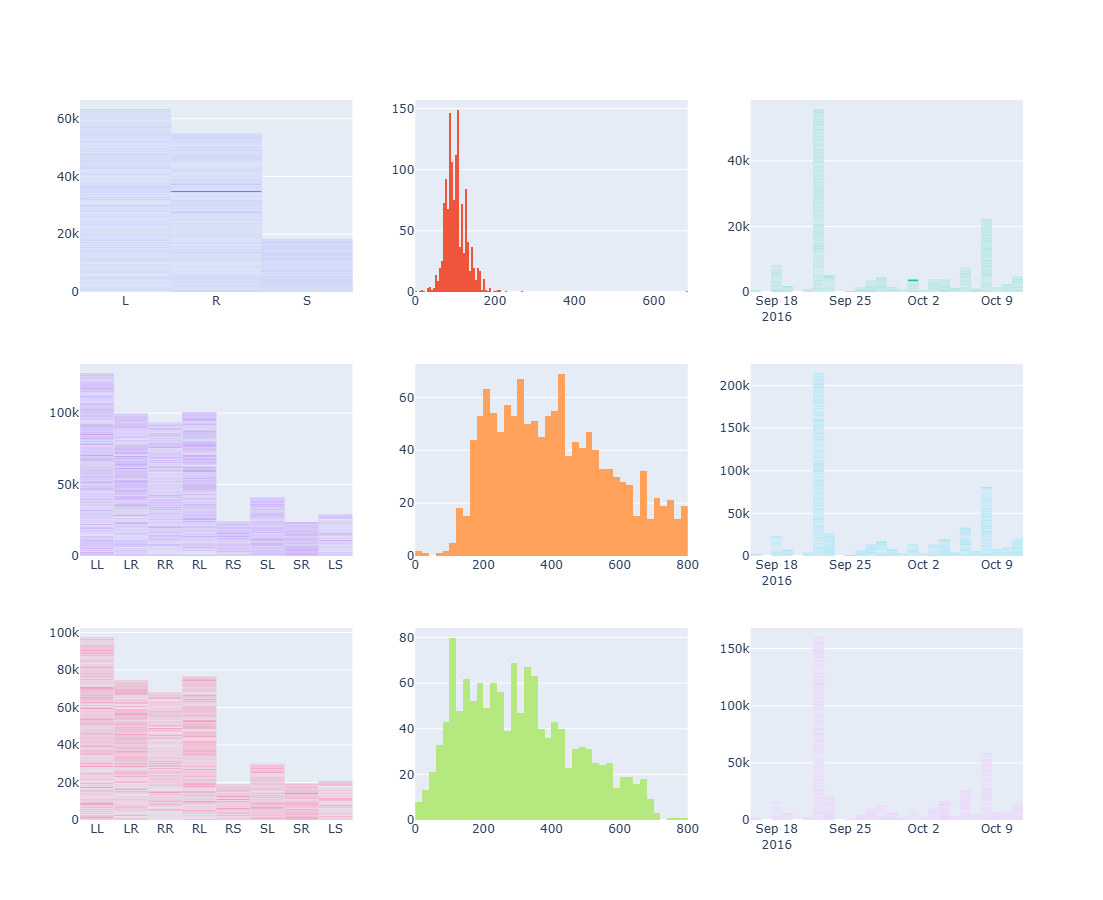

In [59]:
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}],
           [{"type": "bar"}, {"type": "histogram"}, {"type": "bar"}]])

fig.add_trace(go.Bar(x=user2['Hand'], y=user2['HoldTime']),
              row=1, col=1)
fig.add_trace(go.Histogram(x=user2['HoldTime']),
              row=1, col=2)
fig.add_trace(go.Bar(x=user2['DateN'], y=user2['HoldTime']),
              row=1, col=3)


fig.add_trace(go.Bar(x=user2['Direction'], y=user2['LatencyTime']),
              row=2, col=1)
fig.add_trace(go.Histogram(x=user2['LatencyTime']),
              row=2, col=2)
fig.add_trace(go.Bar(x=user2['DateN'], y=user2['LatencyTime']),
              row=2, col=3)

fig.add_trace(go.Bar(x=user2['Direction'], y=user2['FlightTime']),
              row=3, col=1)
fig.add_trace(go.Histogram(x=user2['FlightTime']),
              row=3, col=2)
fig.add_trace(go.Bar(x=user2['DateN'], y=user2['FlightTime']),
              row=3, col=3)


fig.update_layout(height=900, showlegend=False)

fig.show()
# dodaj naslovi, labels i podsredi gi

## MODELING

In [60]:
new_df.columns

Index(['ID', 'mean_L', 'mean_R', 'mean_hold_diff', 'mean_LL', 'mean_LR',
       'mean_RL', 'mean_RR', 'mean_LR_RL_diff', 'mean_LL_RR_diff',
       'Parkinsons_y', 'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis'],
      dtype='object')

In [61]:
X = new_df.drop(['ID', 'mean_hold_diff', 'mean_LR_RL_diff', 'mean_LL_RR_diff',
       'Parkinsons_y', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis'], axis=1)

y = new_df.drop(['ID', 'mean_L', 'mean_R', 'mean_hold_diff', 'mean_LL', 'mean_LR',
       'mean_RL', 'mean_RR', 'mean_LR_RL_diff', 'mean_LL_RR_diff', 'Tremors', 'Sided', 'Impact', 'Levadopa', 'DA', 'MAOB',
       'Other', 'Age on diagnosis'], axis=1)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [63]:
X

mean_L      mean_R     mean_LL     mean_LR     mean_RL     mean_RR  \
0    98.931818  101.595749  309.675159  308.390083  326.538462  267.176863   
1    66.280645   65.036667  319.511765  529.633333  468.335714  329.635294   
2   153.702407  105.622423  227.021698  164.504610  220.913661  214.592083   
3   147.626087  167.039039  373.192713  436.250442  332.958031  317.234259   
4   125.182493  126.045471  176.795994  209.198343  194.253176  210.431553   
..         ...         ...         ...         ...         ...         ...   
76   74.926898   73.006689  162.023400  173.638710  212.575596  192.310112   
77  101.932172  114.030694  215.106704  159.148743  180.505063  186.857911   
78  103.910159  143.413333  158.630065  177.938776  128.561261  244.413846   
79  148.072662  143.832754  357.551718  291.620313  438.157447  405.743478   
80  131.337228  122.645700  154.919598  216.487980  173.605522  233.668296   

    Tremors  Sided  
0         0      1  
1         0      1  
2         0      1  
3         0      1  
4         0      1  
..      ...    ...  
76        0      1  
77        0      1  
78        1      2  
79        0      1  
80        1      2  

[81 rows x 8 columns]

In [64]:
y

Parkinsons_y
0              0
1              0
2              0
3              0
4              1
..           ...
76             0
77             0
78             1
79             0
80             1

[81 rows x 1 columns]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [66]:
lda_model = LDA()

In [67]:
lda_model.fit(X_train, y_train)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LinearDiscriminantAnalysis()

### GaussianNB

In [68]:
gnb = GaussianNB(var_smoothing=0.00000008)
gnb.fit(lda_model.transform(X_train), y_train)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GaussianNB(var_smoothing=8e-08)

In [69]:
gnb.score(lda_model.transform(X_test), y_test)

0.8181818181818182

In [70]:
# y_pred = gnb.predict(X_test)
y_pred = gnb.predict(lda_model.transform(X_test))

In [71]:
print("Gaussian Naive Bayes model accuracy:", metrics.accuracy_score(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 0.8181818181818182


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.80      0.67      0.73        12

    accuracy                           0.82        33
   macro avg       0.81      0.79      0.80        33
weighted avg       0.82      0.82      0.81        33



In [73]:
pred = gnb.predict_proba(lda_model.transform(X_test))
auc = roc_auc_score(y_test, pred[:, 1])
auc

0.8809523809523808

## BernoulliNB

Bernoulli distribution is used for discrete probability calculation. It either calculates success or failure
 the features are independent of one another

In [74]:
X_train

mean_L      mean_R     mean_LL     mean_LR     mean_RL     mean_RR  \
60   63.978253   64.793235  184.477197  157.713151  136.699501  221.982748   
80  131.337228  122.645700  154.919598  216.487980  173.605522  233.668296   
21  163.134427  156.071990  322.742225  312.876671  346.916909  340.895516   
70  110.728559   98.130330  156.140922  152.190027  136.638274  153.272162   
3   147.626087  167.039039  373.192713  436.250442  332.958031  317.234259   
48  103.506318   98.561241  163.187790  153.431876  144.203123  162.287466   
54  103.465022  107.573595  298.247904  362.962795  388.356098  303.302129   
43  156.024588  123.685050  201.674578  176.364934  214.017517  243.631814   
51   97.207237   93.493893  402.735632  632.820000  559.931746  356.981746   
24   98.645075   86.092861  135.105329  137.051340  126.864625  182.340365   
8   126.497906   98.527829  151.369988  162.627400  148.600538  138.230994   
17   76.578682   79.868415  179.159807  344.162724  301.417999  212.513730   
0    98.931818  101.595749  309.675159  308.390083  326.538462  267.176863   
78  103.910159  143.413333  158.630065  177.938776  128.561261  244.413846   
52  125.178150  127.558688  210.734598  175.570604  159.743793  195.034705   
7    72.152276   74.706504  130.296501   98.420496   99.891955  134.364946   
77  101.932172  114.030694  215.106704  159.148743  180.505063  186.857911   
57  107.219889  104.700741  128.498650  131.731961  120.969618  129.913665   
13  114.963095   82.954545  256.002326  199.225000  248.878571  254.476190   
22  128.064035  111.008784  296.930080  258.723948  305.424058  312.414456   
32   75.307162   67.725393  106.428090  150.018067  138.297153  159.021250   
30   99.473423   98.790953  159.770485  120.240880  121.855042  156.537909   
55  188.231429  177.203297  371.569697  274.791429  323.302941  351.281481   
49   96.994231   80.135714  226.258209  208.720000  200.393333  248.582500   
41  181.331470  150.338096  226.360780  167.942499  204.449671  176.488124   
59  113.135198  120.966762  450.863514  379.921895  409.654494  392.972418   
23  129.076100  124.969721  181.401126  129.302975  121.969823  174.427371   
4   125.182493  126.045471  176.795994  209.198343  194.253176  210.431553   
68   79.444158   72.747234  108.500334  159.288603  135.780504  157.997194   
14  161.513710  173.301010  249.897297  210.339655  179.377333  259.012821   
29  107.856475   90.986429  196.675000  215.480973  241.986207  217.043114   
28   79.234152   71.140496  110.451595  160.331363  138.385474  157.800084   
11  122.474658  121.237843  222.873612  246.370553  186.596269  205.692213   
18  145.341014  135.536070  196.139215  147.039674  145.528754  171.835283   
20   98.011688   87.040789  289.075000  398.318750  264.720000  335.653659   
50   86.185975   89.274927  169.539178  118.644246  103.404143  143.690662   
25  121.562821  105.550652  279.114921  319.018888  329.381488  208.661020   
6   131.724002  113.398834  239.461077  356.144164  342.297881  274.641297   
71  111.300863  114.945348  172.780145  150.665202  162.159052  153.645416   
1    66.280645   65.036667  319.511765  529.633333  468.335714  329.635294   
16  101.320393   82.467361  159.056197  121.658216  125.968479  131.075629   
64  180.018274  151.054122  378.059322  289.072222  281.752381  315.517568   
5   186.434423  141.827793  350.865614  321.583041  475.697917  365.159077   
75   72.110209   99.719113  213.905031  225.289727  168.194274  224.223856   
9   129.715948  128.692870  185.557850  167.025401  159.698543  202.805460   
72   92.964479   83.820060  213.515110  177.992445  189.508335  252.088348   
12  142.921354  108.386427  239.339690  219.964664  262.241185  195.656871   
37  138.206452  122.948529  222.621667  195.853704  175.137500  244.628070   

    Tremors  Sided  
60        0      1  
80        1      2  
21        0      1  
70        0      2  
3         0      1  
48        0      1  
54        0      1  
43        0      

In [75]:
X_ber=X_train.values
y_ber = y_train.values
X_test_ber=X_test.values
y_test_ber = y_test.values

In [76]:
bnb = BernoulliNB(alpha=0.04, fit_prior=True)

In [77]:
model_bernuoli = bnb.fit(lda_model.transform(X_train), y_train)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [78]:
y_pred_ber = bnb.predict(lda_model.transform(X_test_ber))

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



In [79]:
pred_ber = bnb.predict_proba(lda_model.transform(X_test_ber))
auc = roc_auc_score(y_test_ber, pred_ber[:, 1])
auc

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



0.8273809523809523

In [80]:
print("Bernuoli Naive Bayes model accuracy:", metrics.accuracy_score(y_test_ber, y_pred_ber))

Bernuoli Naive Bayes model accuracy: 0.8484848484848485


In [81]:
print(classification_report(y_test_ber, y_pred_ber))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.82      0.75      0.78        12

    accuracy                           0.85        33
   macro avg       0.84      0.83      0.83        33
weighted avg       0.85      0.85      0.85        33



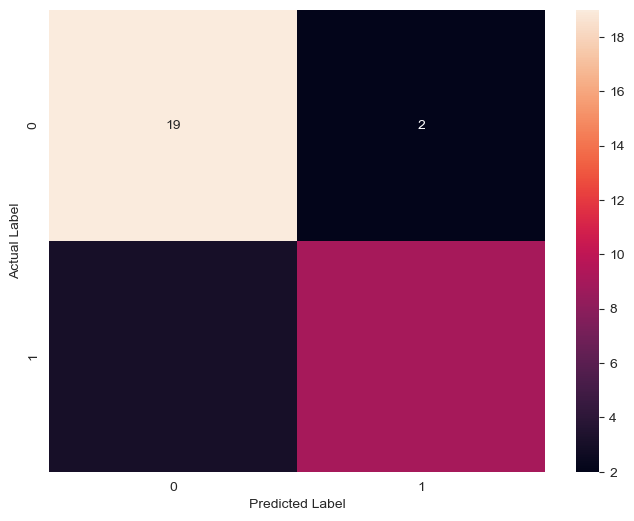

In [82]:
confusion_matrix_Bernuoli = confusion_matrix(y_test_ber, y_pred_ber)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_Bernuoli, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Logistic

In [83]:
scaler = StandardScaler()
X_train_log= scaler.fit_transform(X_train)
X_test_log = scaler.transform(X_test)

In [84]:
model_Logistic = LogisticRegression()
model_Logistic.fit(lda_model.transform(X_train_log), y_train)
# model_Logistic.fit(X_train_log=, y_train)

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression()

In [85]:
y_pred_log= model_Logistic.predict(lda_model.transform(X_test_log))
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.79


C:\Users\veron\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names



In [86]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Confusion Matrix:
 [[19  2]
 [ 5  7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        21
           1       0.78      0.58      0.67        12

    accuracy                           0.79        33
   macro avg       0.78      0.74      0.76        33
weighted avg       0.79      0.79      0.78        33



## XGBClassifier

In [87]:
model_xg = XGBClassifier(n_estimators = 5, max_depth = 3, learning_rate = 0.05)

In [88]:
xg = model_xg.fit(lda_model.transform(X_train), y_train)

y_pred_xg = xg.predict(lda_model.transform(X_test))

accuracy_test = accuracy_score(y_test,y_pred_xg)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.6363636363636364


In [89]:
classifRXG = classification_report(y_test, y_pred_xg)
confusion_matrix_Xg = confusion_matrix(y_test, y_pred_xg)

print(classifRXG)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        21
           1       0.00      0.00      0.00        12

    accuracy                           0.64        33
   macro avg       0.32      0.50      0.39        33
weighted avg       0.40      0.64      0.49        33



C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\veron\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



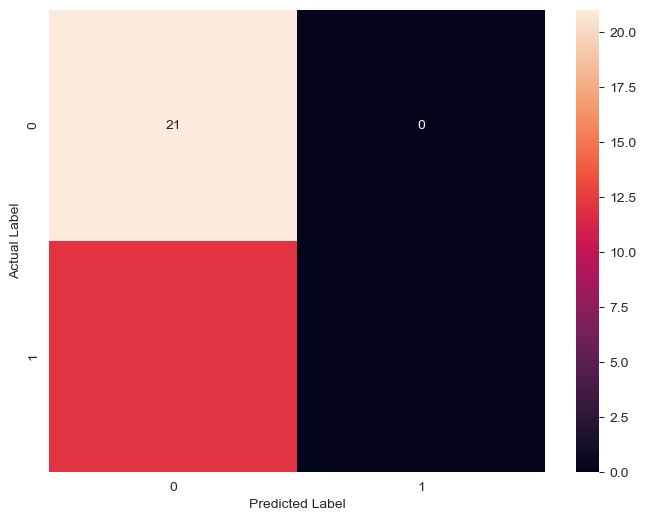

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_Xg, annot=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [91]:
px.histogram()

AttributeError: module 'plotly.express' has no attribute 'histplot'